In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

###  Приближенно решить уравнение e^(-ax) = blnx
Использовать методы бисекции, Ньютона, секущих

In [123]:
def f(x, a=1, b=1):
    return np.exp(a*x)*b*np.log(x) - 1

def df(x, a=1, b=1):
    return b*(a*np.exp(a*x)*np.log(x) + np.exp(a*x)/x)


def bisection(f, l=1e-10, r=1, eps=1e-10, y=0, true_value=None, *args, **kwargs):
    citer = 0
    errors = []
    while abs(r - l) >= eps:
        citer += 1
        mid = (l + r) / 2
        
        if f(mid, *args, **kwargs) == y:
            return mid, citer, errors
        
        if (f(mid, *args, **kwargs) - y) * (f(l, *args, **kwargs) - y) < 0:
            r = mid
        else:
            l = mid

        if true_value is not None:
            errors.append(abs(mid - true_value))

    return (r + l) / 2, citer, errors


def newton(f, df, x0=1e-5, eps=1e-10, y=0, true_value=None, *args, **kwargs):
    x1 = x0 - f(x0, *args, **kwargs) / df(x0, *args, **kwargs)
    errors = []
    citer = 0
    while abs(x1 - x0) >= eps:
        citer += 1
        if f(x1, *args, **kwargs) == y: return x1, citer, errors
        x0 = x1
        x1 = x0 - (f(x0, *args, **kwargs) - y) / df(x0, *args, **kwargs)
        
        if true_value is not None:
            errors.append(abs(x1 - true_value))

    return x1, citer, errors


def secant(f, x0=1e-5, x1=1, eps=1e-10, y=0, true_value=None, *args, **kwargs):
    x2 = (x0*f(x1, *args, **kwargs) - x1*f(x0, *args, **kwargs)) / (f(x1, *args, **kwargs) - f(x0, *args, **kwargs))
    errors = []
    citer = 0
    while abs(x2 - x1) >= eps:
        citer += 1
        if (f(x2) == y): return x2, citer, errors
        x0 = x1
        x1 = x2
        x2 = (x0*(f(x1, *args, **kwargs) - y) - x1*(f(x0, *args, **kwargs) - y)) / ((f(x1, *args, **kwargs) - y) - (f(x0, *args, **kwargs) - y))

        if true_value is not None:
            errors.append(abs(x2 - true_value))

    return x2, citer, errors

b_values, b_iters, b_errors = bisection(f, 1, 2)
n_values, n_iters, n_errors = newton(f, df)
s_values, s_iters, s_errors = secant(f)

print(b_values, b_iters)
print(n_values, n_iters)
print(s_values, s_iters)

1.309799585811561 34
1.3097995858041505 10
1.3097995858041507 6


In [139]:
f_test = lambda x: x**2 - 2
df_test = lambda x: 2*x
true_value = np.sqrt(2)

b_x, b_iters, b_errors = bisection(f_test, 0, 2, eps=1e-10, true_value=true_value)
s_x, s_iters, s_errors = secant(f_test, 1, 2, eps=1e-10, true_value=true_value)
n_x, n_iters, n_errors = newton(f_test, df_test, 1, eps=1e-10, true_value=true_value)

p = {'bisection': 1, 'newton': 2, 'secant': (1+np.sqrt(5))/2}
b_e = np.array(b_errors[1:]) / np.array(b_errors[:-1]) + 1e-15
s_e = np.array(s_errors[1:]) / (np.array(s_errors[:-1]) + 1e-15)**((1+np.sqrt(5))/2)
n_e = np.array(n_errors[1:]) / (np.array(n_errors[:-1]) + 1e-15)**2

print(b_e[-5:])
print(s_e[-5:])
print(n_e[-5:])

[82.50695841  0.49393991  0.48773111  0.47484497  0.44702475]
[4.10055032e-01 6.16388832e-01 4.76724936e-01 0.00000000e+00
 4.13952068e+08]
[0.35294118 0.35352238 0.        ]


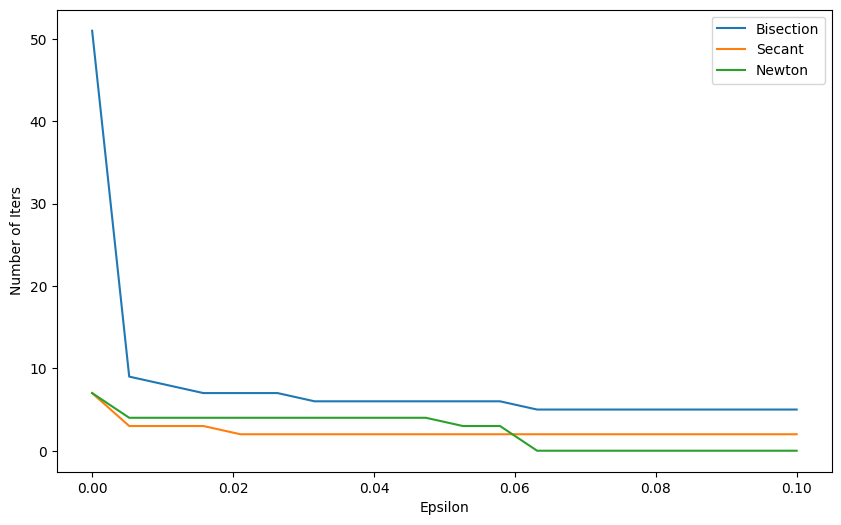

In [140]:
def f(x, a=1, b=1):
    return np.exp(a*x)*b*np.log(x + 1e-15) - 1

def df(x, a=1, b=1):
    return b*(a*np.exp(a*x)*np.log(x + 1e-15) + np.exp(a*x)/x)

eps = np.linspace(1e-15, 1e-1, 20)
bisection_iters = []
newton_iters = []
secant_iters = []

for e in eps:
    _, b_iter, _ = bisection(f, 0, 2, e)
    _, n_iter, _ = newton(f, df, 1e-2, e)
    _, s_iter, _ = secant(f, 1e-2, 1, e)

    bisection_iters.append(b_iter)
    newton_iters.append(n_iter)
    secant_iters.append(s_iter)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.plot(eps, bisection_iters, label="Bisection")
axes.plot(eps, secant_iters, label="Secant")
axes.plot(eps, newton_iters, label="Newton")
axes.set_xlabel("Epsilon")
axes.set_ylabel("Number of Iters")
axes.legend()
plt.show()

In [142]:
from scipy.optimize import fsolve

a_range = np.arange(1, 4.6, 0.5)
b_range = np.arange(1, 4.6, 0.5)

arguments = []
bisection_results = []
newton_results = []
secant_results = []
true_values = []

for a in a_range:
    for b in b_range:
        arguments.append((a, b))
        f = lambda x: np.exp(a*x)*b*np.log(x+1e-15) - 1
        df = lambda x: b*(a*np.exp(a*x)*np.log(x+1e-15) + np.exp(a*x)/x)
        
        bisection_result, bisection_iter, _ = bisection(f, 1e-5, 2, 1e-10)
        secant_result, secant_iter, _ = secant(f, 0.1, 1, 1e-10)
        newton_result, newton_iter, _ = newton(f, df, 0.1, 1e-10)

        bisection_results.append(bisection_result)
        newton_results.append(newton_result)
        secant_results.append(secant_result)
        true_values.append(fsolve(f, 1, epsfcn=1e-10)[0])

print(arguments)
print(true_values)
print(bisection_results)
print(newton_results)
print(secant_results)

[(np.float64(1.0), np.float64(1.0)), (np.float64(1.0), np.float64(1.5)), (np.float64(1.0), np.float64(2.0)), (np.float64(1.0), np.float64(2.5)), (np.float64(1.0), np.float64(3.0)), (np.float64(1.0), np.float64(3.5)), (np.float64(1.0), np.float64(4.0)), (np.float64(1.0), np.float64(4.5)), (np.float64(1.5), np.float64(1.0)), (np.float64(1.5), np.float64(1.5)), (np.float64(1.5), np.float64(2.0)), (np.float64(1.5), np.float64(2.5)), (np.float64(1.5), np.float64(3.0)), (np.float64(1.5), np.float64(3.5)), (np.float64(1.5), np.float64(4.0)), (np.float64(1.5), np.float64(4.5)), (np.float64(2.0), np.float64(1.0)), (np.float64(2.0), np.float64(1.5)), (np.float64(2.0), np.float64(2.0)), (np.float64(2.0), np.float64(2.5)), (np.float64(2.0), np.float64(3.0)), (np.float64(2.0), np.float64(3.5)), (np.float64(2.0), np.float64(4.0)), (np.float64(2.0), np.float64(4.5)), (np.float64(2.5), np.float64(1.0)), (np.float64(2.5), np.float64(1.5)), (np.float64(2.5), np.float64(2.0)), (np.float64(2.5), np.float6

C:\Users\kamol\AppData\Local\Temp\ipykernel_25916\4146461076.py:15: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.exp(a*x)*b*np.log(x+1e-15) - 1
C:\Users\kamol\AppData\Local\Temp\ipykernel_25916\4146461076.py:16: RuntimeWarning: invalid value encountered in log
  df = lambda x: b*(a*np.exp(a*x)*np.log(x+1e-15) + np.exp(a*x)/x)


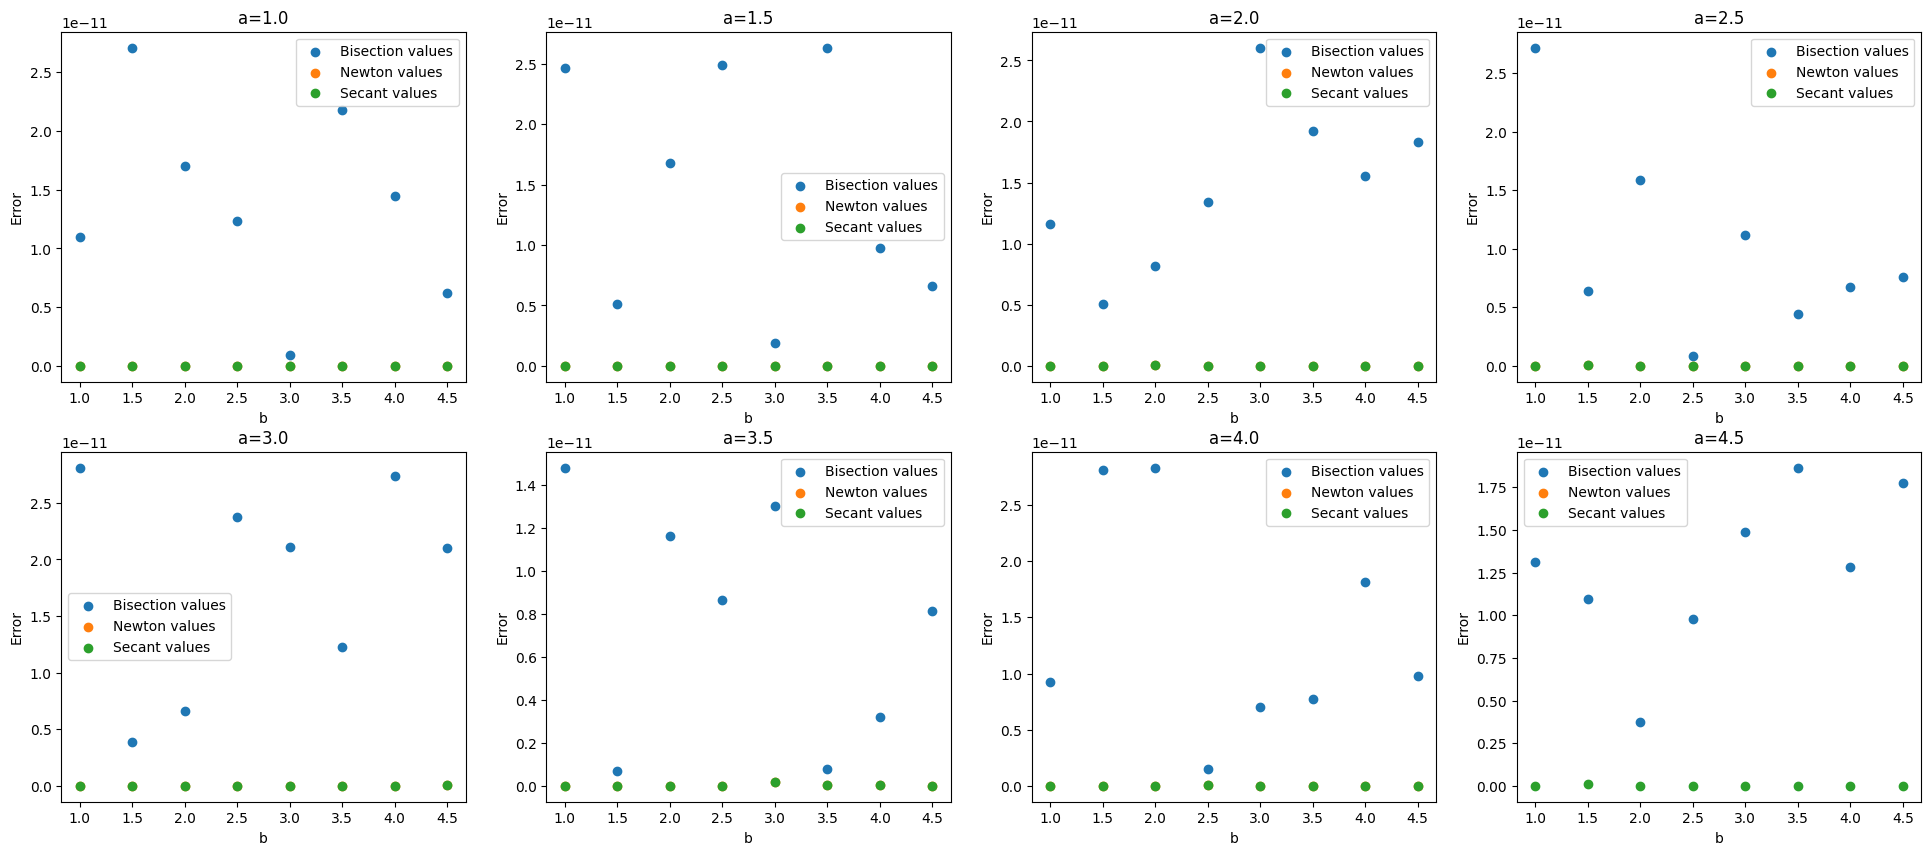

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.flatten()
for i, a in enumerate(a_range):
    first_index = i*len(a_range)
    last_index = (i+1)*len(b_range)

    tvalues = np.array([x for x in true_values[first_index:last_index]])
    bisection_values = np.abs(tvalues - np.array([x for x in bisection_results[first_index:last_index]]))
    newton_values = np.abs(tvalues - np.array([x for x in newton_results[first_index:last_index]]))
    secant_values = np.abs(tvalues - np.array([x for x in secant_results[first_index:last_index]]))
    # axes[i].scatter(b_range, tvalues, label="True values")
    axes[i].scatter(b_range, bisection_values, label="Bisection values")
    axes[i].scatter(b_range, newton_values, label="Newton values")
    axes[i].scatter(b_range, secant_values, label="Secant values")
    axes[i].set_title(f"a={a}")
    axes[i].set_xlabel("b")
    axes[i].set_ylabel("Error")
    axes[i].legend()

plt.show()

### Решение задачи про русла

Даны два пересекающихся под углом **γ** канала с диаметрами **a** и **b**. Требуется найти максимальную длину бревна **L**, которое можно протащить через это пересечение.

![alt text](<Screenshot 2025-05-30 075621.png>)

Задача сводится к отысканию минимума функции L(x).

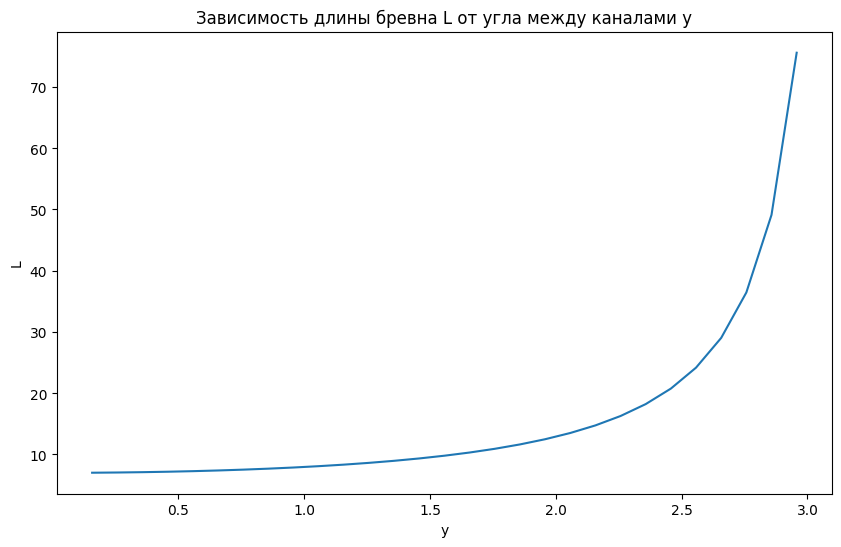

In [7]:
def solve(a, b, y):
    L = lambda x: b/np.sin(x+1e-11) + a/np.sin(x+y+1e-11)
    dL = lambda x: (-b*np.cos(x)/np.sin(x+1e-11)**2 - a*np.cos(x+y)/np.sin(x+y+1e-11)**2) / (a + b)

    zero, _, _ = bisection(dL, l=0, r=np.pi)
    if dL(zero-0.01) < 0 and dL(zero+0.01) > 0:
        return L(zero)
    
    print("Найденная критическая точка не минимум")
    return None


a, b, y = 3, 4, np.pi/2
ys = np.arange(np.pi/20, np.pi-0.1, 0.1)
ls = []

for y in ys:
    ls.append(solve(a, b, y))

plt.figure(figsize=(10, 6))
plt.title("Зависимость длины бревна L от угла между каналами y")
plt.xlabel("y")
plt.ylabel("L")
plt.plot(ys, ls)
plt.show()

### Поиск обратной функции
f(x) = e^(ax) * blnx - 1

In [8]:
from scipy.optimize import fsolve

def inverse(f, y, method='bisection', df=None, l=1e-5, r=10, x0=1.0, x1=2.0, eps=1e-12, *args, **kwargs):
    if method == 'bisection':
        return bisection(f, l=l, r=r, eps=eps, y=y, *args, **kwargs)
    elif method == 'newton':
        if df is None:
            print("Для метода Ньютона необходимо предоставить производную функции f.")
        return newton(f, df, x0=x0, eps=eps, y=y, *args, **kwargs)
    elif method == 'secant':
        return secant(f, x0=x0, x1=x1, eps=eps, y=y, *args, **kwargs)
    else:
        return 0, -1

Бисекция: x = 2.9999999999998295, итераций: 44
Ньютон: x = 3.0, итераций: 8
Секущие: x = 3.0, итераций: 9


(np.float64(3.503863865716994e-13),
 np.float64(4.440892098500626e-16),
 np.float64(4.440892098500626e-16))

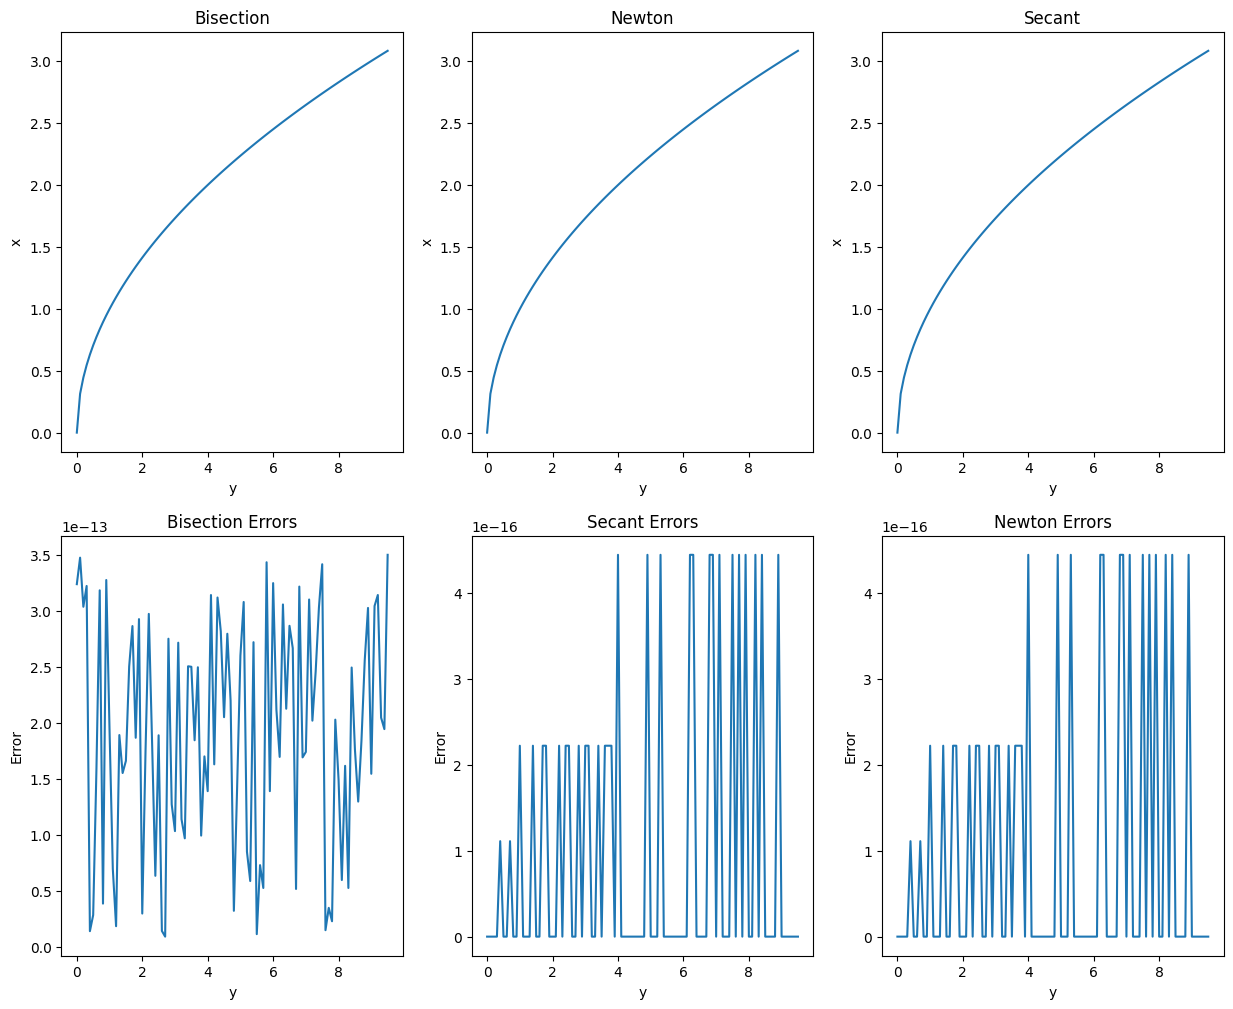

In [9]:
f1 = lambda x: x**2
df1 = lambda x: 2*x

y_value = 9
x_bisect, iter_bisect, _ = inverse(f1, y_value, method='bisection', l=0, r=10)
print(f"Бисекция: x = {x_bisect}, итераций: {iter_bisect}")

x_newton, iter_newton, _ = inverse(f1, y_value, method='newton', df=df1, x0=1.0)
print(f"Ньютон: x = {x_newton}, итераций: {iter_newton}")

x_secant, iter_secant, _ = inverse(f1, y_value, method='secant', x0=1.0, x1=10.0)
print(f"Секущие: x = {x_secant}, итераций: {iter_secant}")

ys = np.arange(1e-5, 9.55, 0.1)

def inverse_function(f, df, ys, show_plot=True):
    xs_bisect = []
    xs_newton = []
    xs_secant = []
    l, l_iter, _ = inverse(f1, ys[0], 'newton', df=df1, x0=1e-15)
    r, r_iter, _ = inverse(f1, ys[-1], 'newton', df=df1, x0=4)
    x0, niter, _ = inverse(f1, ys[1], method='newton', df=df1, x0=1.0)
    x1, niter, _ = inverse(f1, ys[2], method='newton', df=df1, x0=1.0)
    for y in ys:
        x_bisect, iter_bisect, _ = inverse(f1, y, method='bisection', l=l, r=r)
        x_newton, iter_newton, _ = inverse(f1, y, method='newton', df=df1, x0=x0)
        x_secant, iter_secant, _ = inverse(f1, y, method='secant', x0=x0, x1=x1)
        xs_bisect.append(x_bisect)
        xs_newton.append(x_newton)
        xs_secant.append(x_secant)

    if show_plot:
        fig, axes = plt.subplots(2, 3, figsize=(15, 12))
        axes = axes.flatten()

        axes[0].plot(ys, xs_bisect)
        axes[0].set_title("Bisection")
        axes[0].set_xlabel("y")
        axes[0].set_ylabel("x")

        axes[1].plot(ys, xs_newton)
        axes[1].set_title("Newton")
        axes[1].set_xlabel("y")
        axes[1].set_ylabel("x")

        axes[2].plot(ys, xs_secant)
        axes[2].set_title("Secant")
        axes[2].set_xlabel("y")
        axes[2].set_ylabel("x")

        xs_true = np.vectorize(lambda x: x**(1/2))(ys)
        errors_bisect = np.abs(xs_true - xs_bisect)
        errors_secant = np.abs(xs_true - xs_secant)
        errors_newton = np.abs(xs_true - xs_secant)

        axes[3].plot(ys, errors_bisect)
        axes[3].set_title("Bisection Errors")
        axes[3].set_xlabel("y")
        axes[3].set_ylabel("Error")

        axes[4].plot(ys, errors_secant)
        axes[4].set_title("Secant Errors")
        axes[4].set_xlabel("y")
        axes[4].set_ylabel("Error")

        axes[5].plot(ys, errors_newton)
        axes[5].set_title("Newton Errors")
        axes[5].set_xlabel("y")
        axes[5].set_ylabel("Error")

    return max(errors_bisect), max(errors_secant), max(errors_newton)

inverse_function(f1, df1, ys)

(np.float64(2.55351295663786e-13),
 np.float64(4.440892098500626e-16),
 np.float64(4.440892098500626e-16))

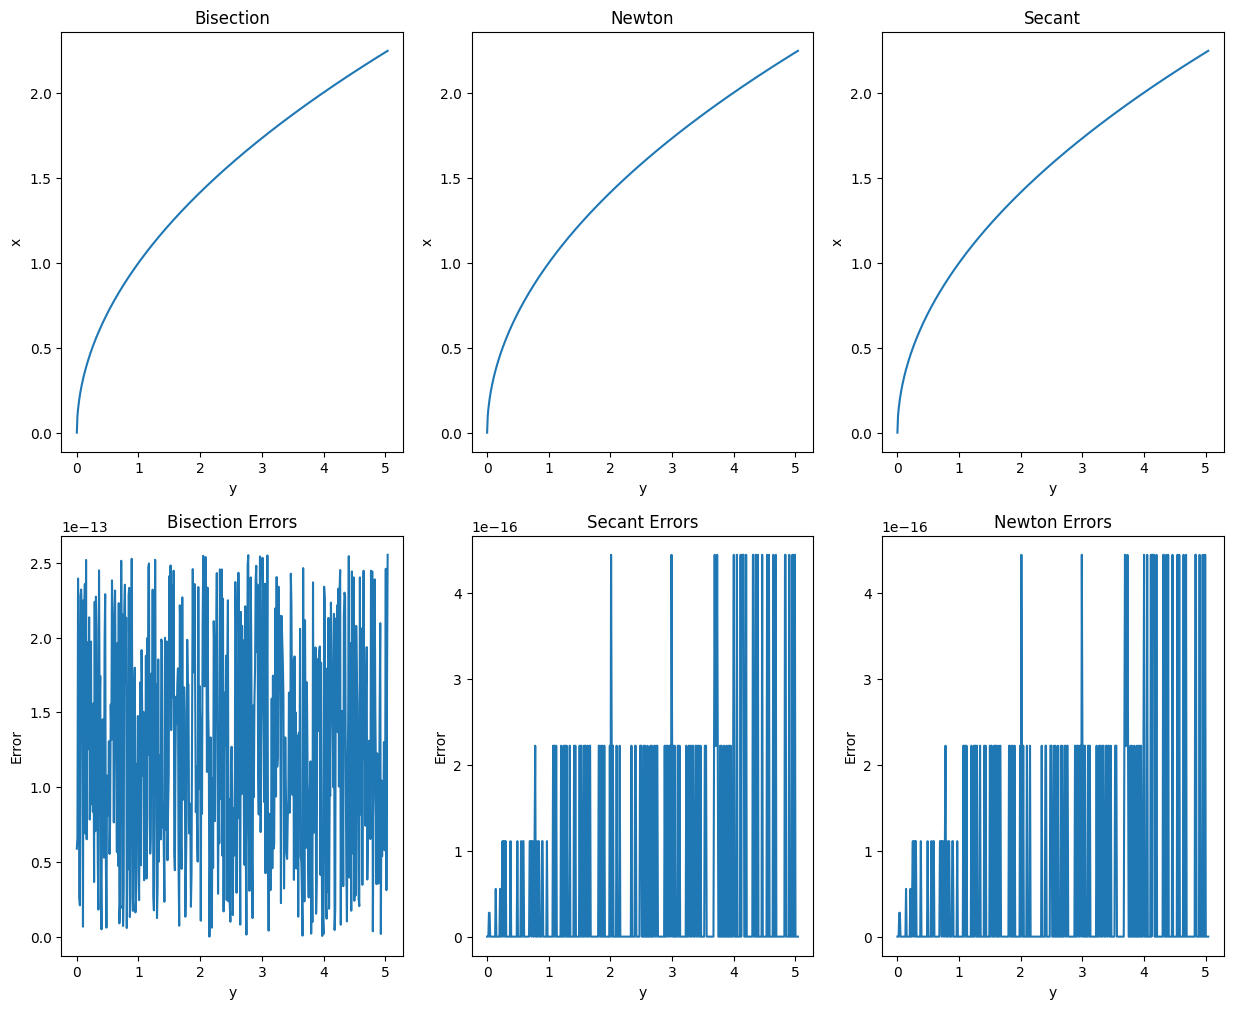

In [10]:
f2 = np.log
df2 = lambda x: 1/x

ys = np.arange(1e-5, 5.05, 0.01)
inverse_function(f2, df2, ys)

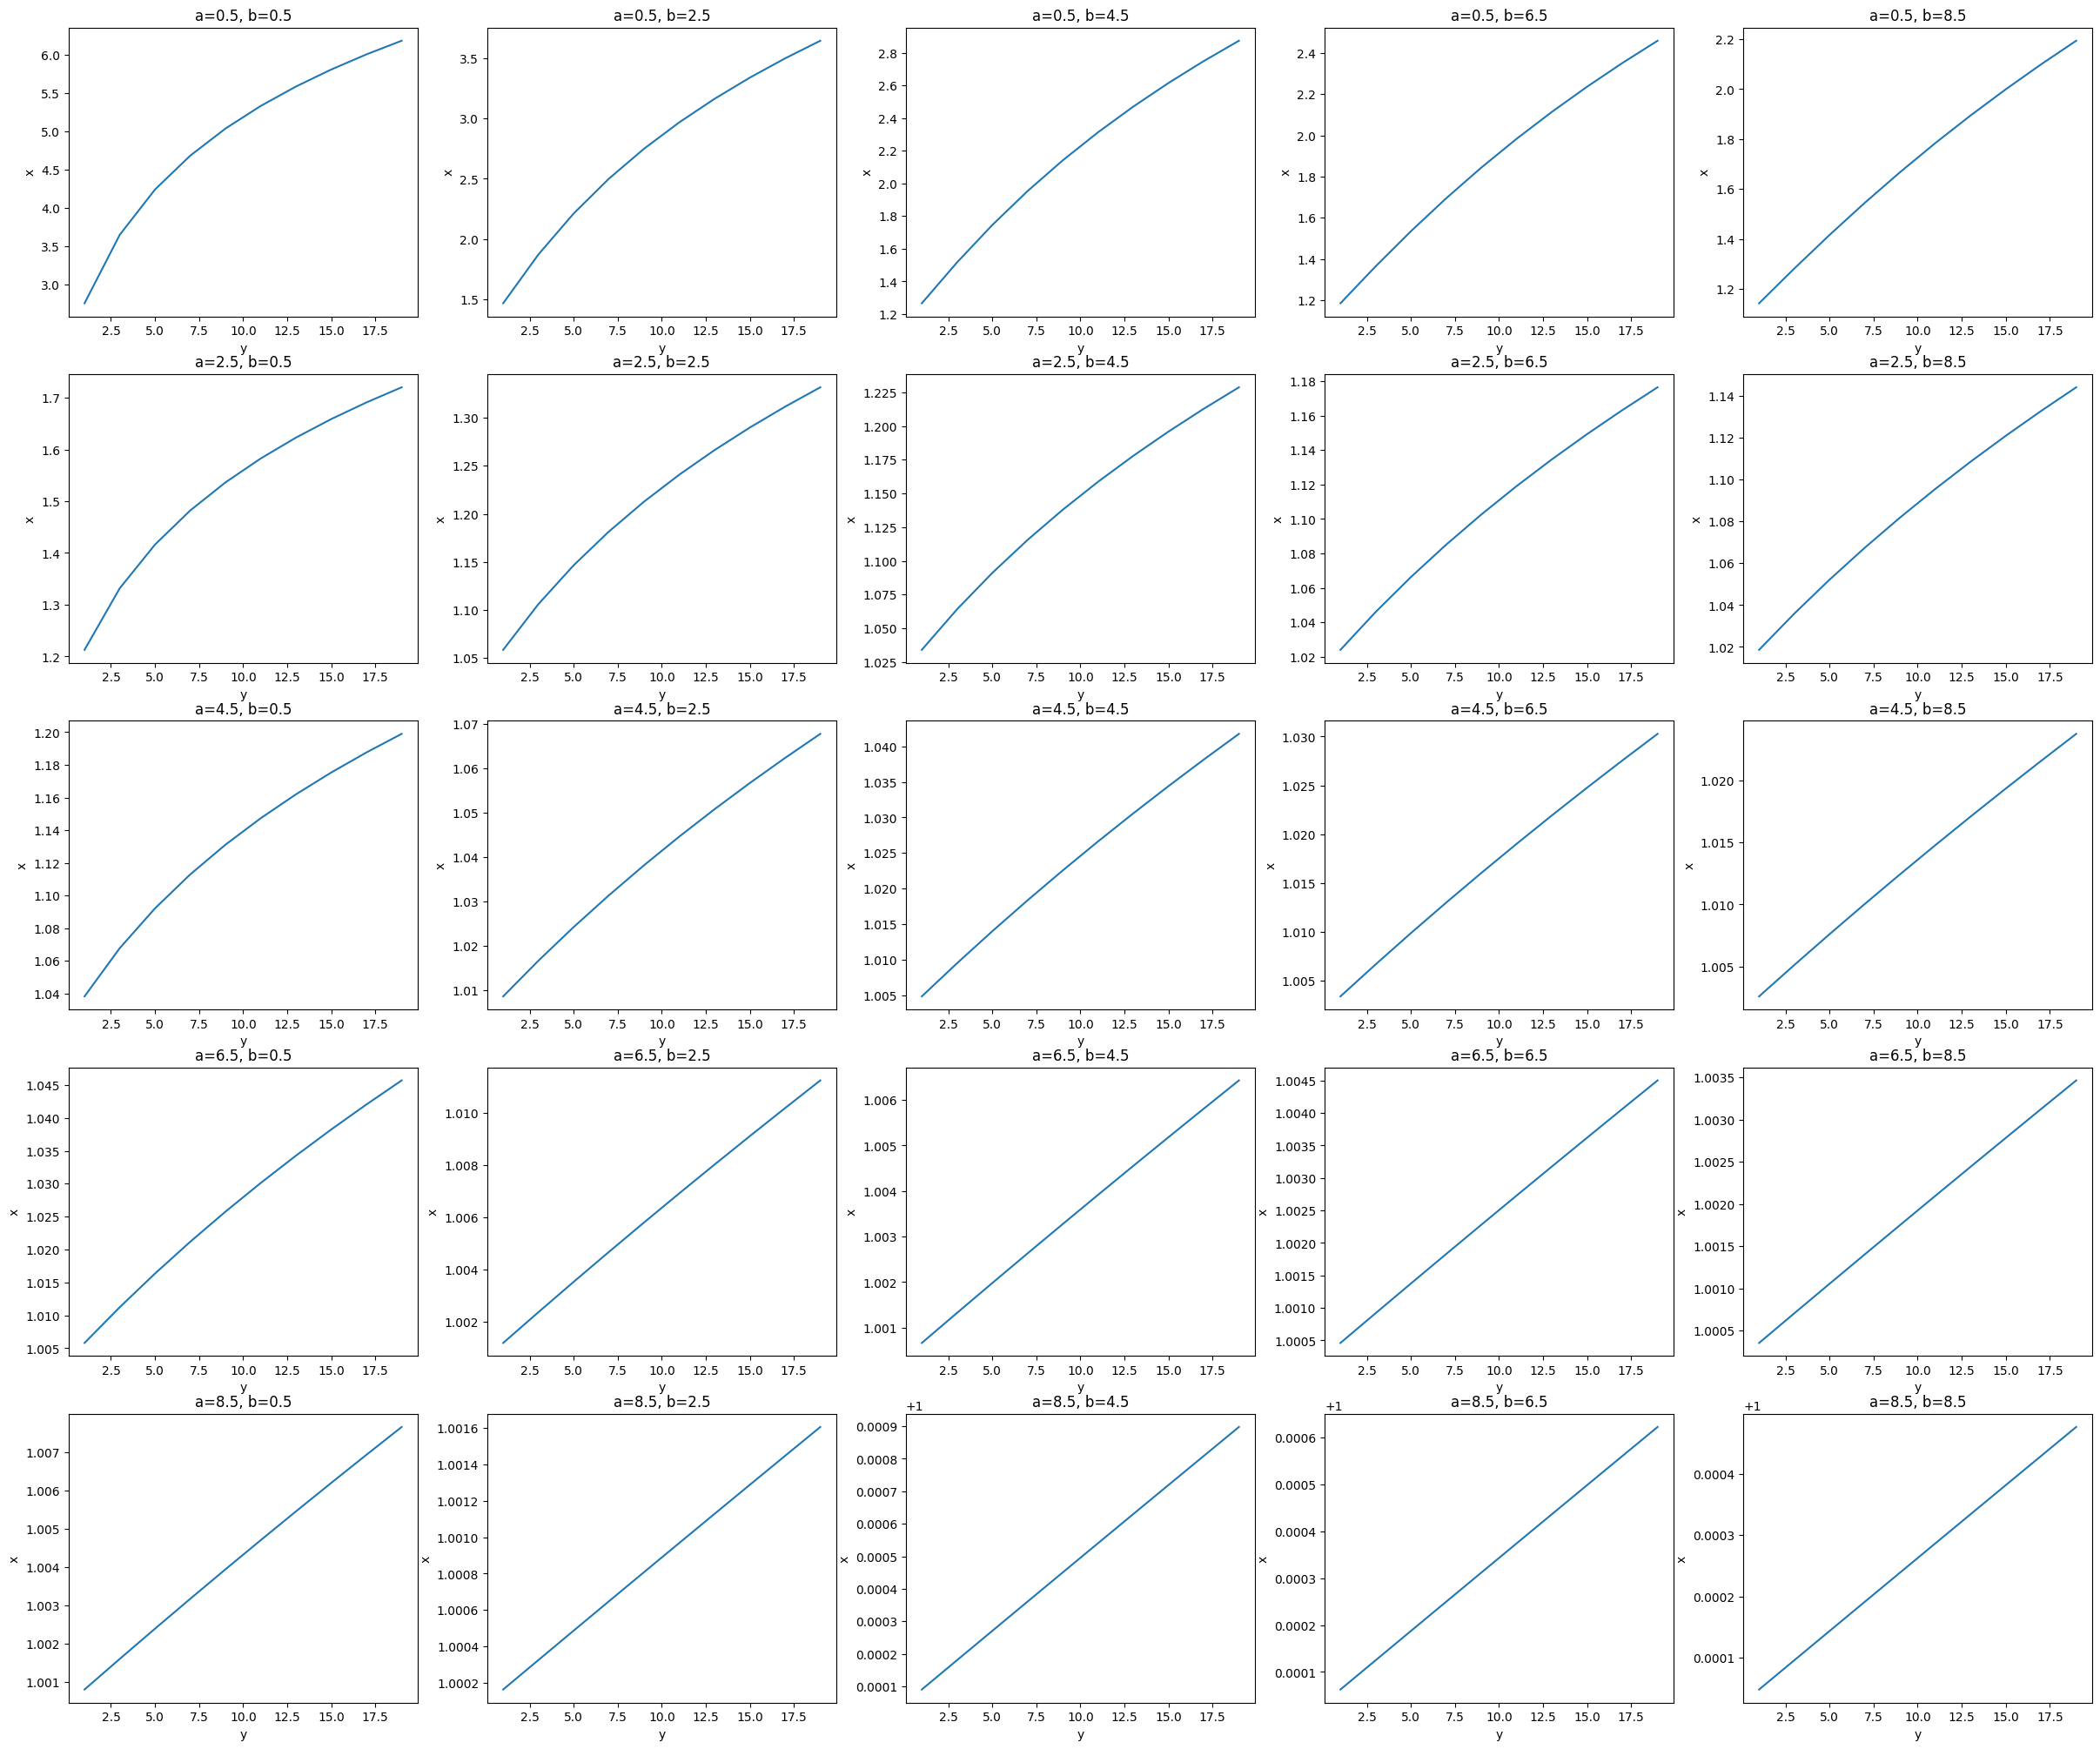

In [11]:
f = lambda x, a, b: np.exp(a * x) * b * np.log(x) - 1
df = lambda x, a, b: np.exp(a * x) * b * (a * np.log(x) + 1 / x)

a_values = np.arange(0.5, 10.1, 2)
b_values = np.arange(0.5, 10.1, 2)
y_values = np.arange(1.0, 20.1, 2)

results = {}

for a in a_values:
    for b in b_values:
        fab = lambda x: f(x, a, b)
        dfab = lambda x: df(x, a, b)

        x_results = []
        for y in y_values:
            x, niter, _ = inverse(f=fab, df=dfab, y=y, method="newton", x0=1.0)
            x_results.append(x)
        results[(a, b)] = x_results
        # print(x_results)


fig, axes = plt.subplots(5, 5, figsize=(30, 25))
axes = axes.flatten()
i = 0
for (a, b), x_vals in results.items():
    axes[i].plot(y_values, x_vals)
    axes[i].set_title(f"a={a}, b={b}")
    axes[i].set_xlabel('y')
    axes[i].set_ylabel('x')
    i += 1

## Приближенное вычисление неявной функции 

ax + by = c*e^(-(x^2 + y^2)) при x=10

In [12]:
def bisection(f, l=-15, r=15, eps=1e-10, x=10, *args, **kwargs):
    fl = f(x, l, *args, **kwargs)
    fr = f(x, r, *args, **kwargs)

    citer = 0
    while abs(r - l) >= eps:
        citer += 1
        mid = (l + r) / 2
        fmid = f(x, mid, *args, **kwargs)

        if abs(fmid) < eps:
            return mid, citer

        if fl * fmid < 0:
            r = mid 
            fr = fmid
        else:
            l = mid
            fl = fmid

    return (r + l) / 2, citer

def newton(f, df, y0=0, eps=1e-10, x=10, max_iter=100, *args, **kwargs):
    citer = 0
    while citer < max_iter:
        f_val = f(x, y0, *args, **kwargs)
        df_val = df(x, y0, *args, **kwargs)
        if df_val == 0:
            print(f"Производная ноль или не существует: {x}")
            return None, citer
        y1 = y0 - f_val / df_val
        if abs(y1 - y0) < eps:
            return y1, citer
        y0 = y1
        citer += 1
    print(f"Превышено максимальное число итераций: {x}")
    return None, citer

def secant(f, y0=-1, y1=1, eps=1e-10, x=10, max_iter=100, *args, **kwargs):
    f0 = f(x, y0, *args, **kwargs)
    f1 = f(x, y1, *args, **kwargs)
    citer = 0
    while abs(y1 - y0) >= eps and citer < max_iter:
        y2 = y1 - f1 * (y1 - y0) / (f1 - f0)
        f2 = f(x, y2, *args, **kwargs)
        if abs(f2) < eps:
            return y2, citer
        y0, f0 = y1, f1
        y1, f1 = y2, f2
        citer += 1
    
    print(f"Превышено максимальное число итераций: {x}")
    return None, citer

In [13]:
def f(x, y, a=1, b=1, c=1):
    return a*x + b*y - c*np.exp(-(x**2 + y**2))

def dfdy(x, y, a=1, b=1, c=1):
    return b + c*np.exp(-x**2-y**2) * 2*y


print(bisection(f, -15, 15, 1e-10)[0])
print(newton(f, dfdy, 0.1, 1e-10)[0])
print(secant(f, 0.1, 1, 1e-10)[0])

-10.00000000007276
-10.0
-9.999999999999996


Превышено максимальное число итераций: 0.0
Превышено максимальное число итераций: 0.0
Производная ноль или не существует: 1.99
Производная ноль или не существует: 1.99


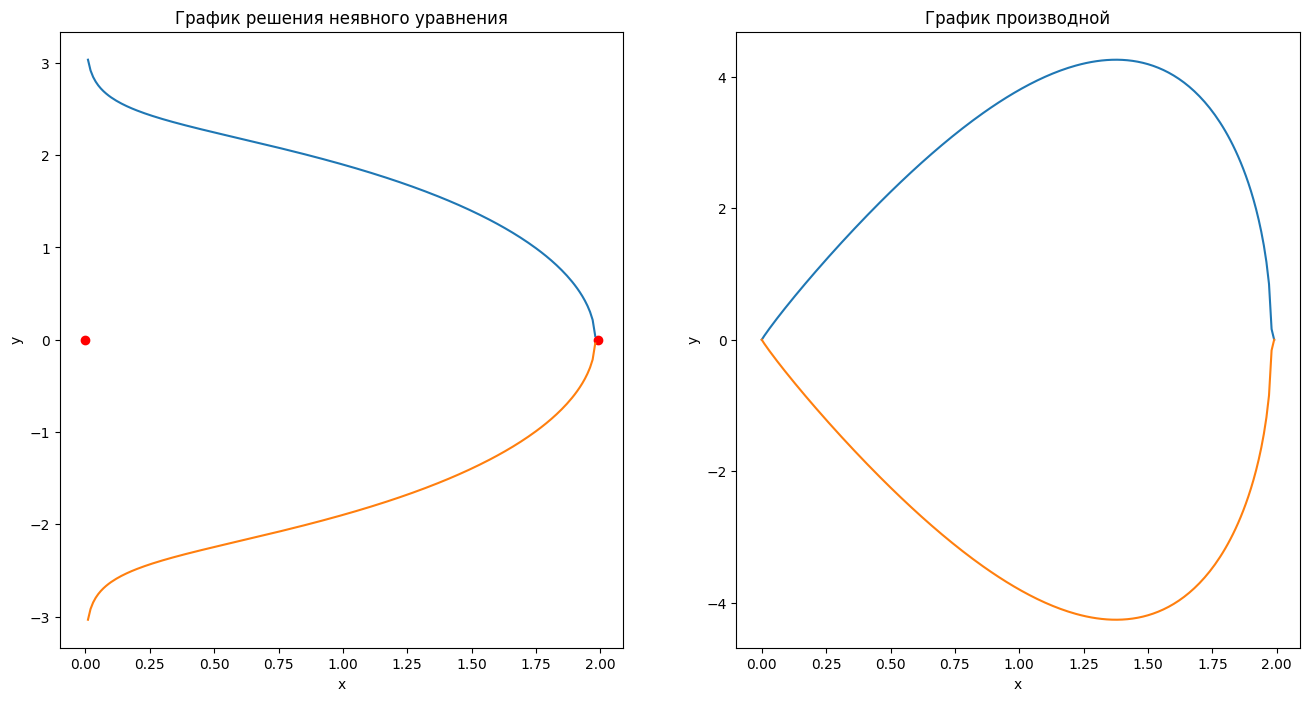

In [14]:
a, b, c = 1, 0, 100
f = lambda x, y: a*x + b*y - c*np.exp(-(x**2 + y**2))
dfdy = lambda x, y: b + c*np.exp(-x**2-y**2) * 2*y

x_values = np.arange(0, 2, 0.01)
y1_values = []
y2_values = []

for x in x_values:
    y1, _ = newton(f, dfdy, y0=1, x=x)
    y2, _ = newton(f, dfdy, y0=-1, x=x)
    y1_values.append(y1)
    y2_values.append(y2)


dfdy1_values = [dfdy(x, y) if y is not None else dfdy(x, 0) for x, y in zip(x_values, y1_values)]
dfdy2_values = [dfdy(x, y) if y is not None else dfdy(x, 0) for x, y in zip(x_values, y2_values)]
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes = axes.flatten()
axes[0].plot(x_values, y1_values)
axes[0].plot(x_values, y2_values)
axes[0].scatter([x_values[i] for i in range(len(x_values)) if y1_values[i] is None],
                [0 for i in range(len(x_values)) if y1_values[i] is None], color='red')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('График решения неявного уравнения')
axes[1].plot(x_values, dfdy1_values)
axes[1].plot(x_values, dfdy2_values)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('График производной')
plt.show()

Точки бифуркации - это возможно точки, в которых df/dy = 0, так как в них нарушается условие теоремы о неявной функции

### Аппроксимация функций одной переменной

Кусочно-линейная интерполяция

In [15]:
def local_linear_interp(x, x0, x1, f0, f1):
    phi0 = (x1 - x) / (x1 - x0)
    phi1 = (x - x0) / (x1 - x0)
    return f0*phi0 + f1*phi1

def adaptive_linear_interpolation(f, a, b, eps=1e-5, max_nodes=200):
    nodes = np.array([a, b], dtype=float)
    values = np.array([f(a), f(b)], dtype=float)
    max_error = None

    while len(nodes) < max_nodes:
        mids = 0.5*(nodes[:-1] + nodes[1:])
        f_true = f(mids)
        f_interp = local_linear_interp(mids, nodes[:-1], nodes[1:], values[:-1], values[1:])
        errors = np.abs(f_true - f_interp)

        worst = np.argmax(errors)
        max_error = errors[worst]
        if max_error < eps:
            break

        mid = mids[worst]
        idx = np.searchsorted(nodes, mid)
        nodes = np.insert(nodes, idx, mid)
        values = np.insert(values, idx, f_true[worst])

    return nodes, values, max_error

[0.18820214 0.1699283  0.18537904 0.18537904 0.18537904 0.18537904
 0.18537904 0.18537904 0.18537904 0.18537904 0.18537904 0.18537904
 0.18537904 0.18537904 0.18537904 0.18537904 0.18537904 0.18537904
 0.18537904 0.18537904]
[2.5369395  2.64912753 2.36836534 2.7112997  2.21125255 2.84419311
 2.84419311 2.84419311 2.84419311 2.84419311 2.84419311 2.84419311
 2.84419311 2.84419311 2.84419311 2.84419311 2.84419311 2.84419311
 2.84419311 2.84419311]
[0.60770819 0.60891542 0.5615806  0.60498543 0.60498543 0.60498543
 0.60498543 0.60498543 0.60498543 0.60498543 0.60498543 0.60498543
 0.60498543 0.60498543 0.60498543 0.60498543 0.60498543 0.60498543
 0.60498543 0.60498543]


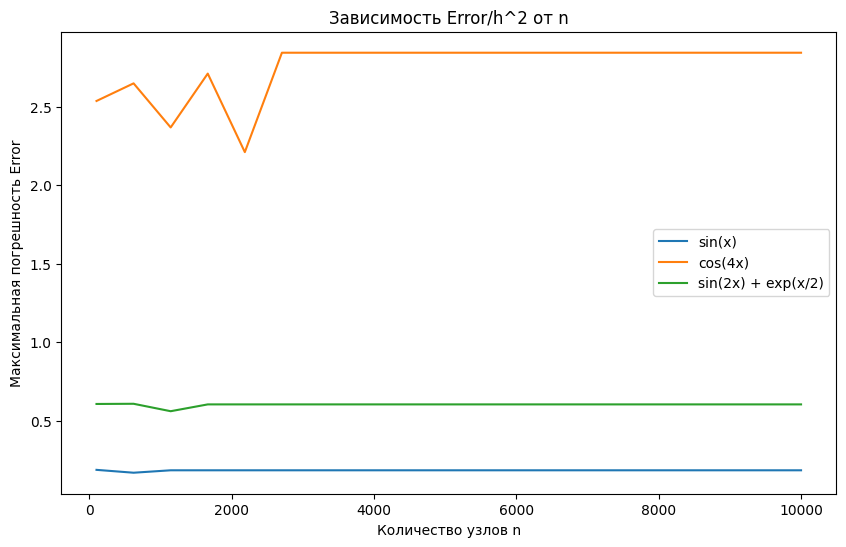

In [16]:
f1 = lambda x: np.sin(x)
f2 = lambda x: np.cos(4*x)
f3 = lambda x: np.sin(2*x) + np.exp(x/2)

fs = [(f1, "sin(x)"), (f2, 'cos(4x)'), (f3, "sin(2x) + exp(x/2)")]
plt.figure(figsize=(10, 6))

for f, name in fs:
    ns = np.linspace(100, 10000-1, 20)
    errors = []
    hs = []

    for n in ns:
        nodes, values, max_error = adaptive_linear_interpolation(f, 0, 5, eps=1e-5, max_nodes=int(n))
        errors.append(max_error)
        h = np.mean(np.diff(nodes))
        hs.append(h)

    # print(hs)
    # print(errors)

    plt.plot(ns, np.array(errors) / np.array(hs)**2, label=name)
    print(np.array(errors) / np.array(hs)**2)
    
plt.xlabel('Количество узлов n')
plt.ylabel('Максимальная погрешность Error')
plt.title('Зависимость Error/h^2 от n')
plt.legend()
plt.show()

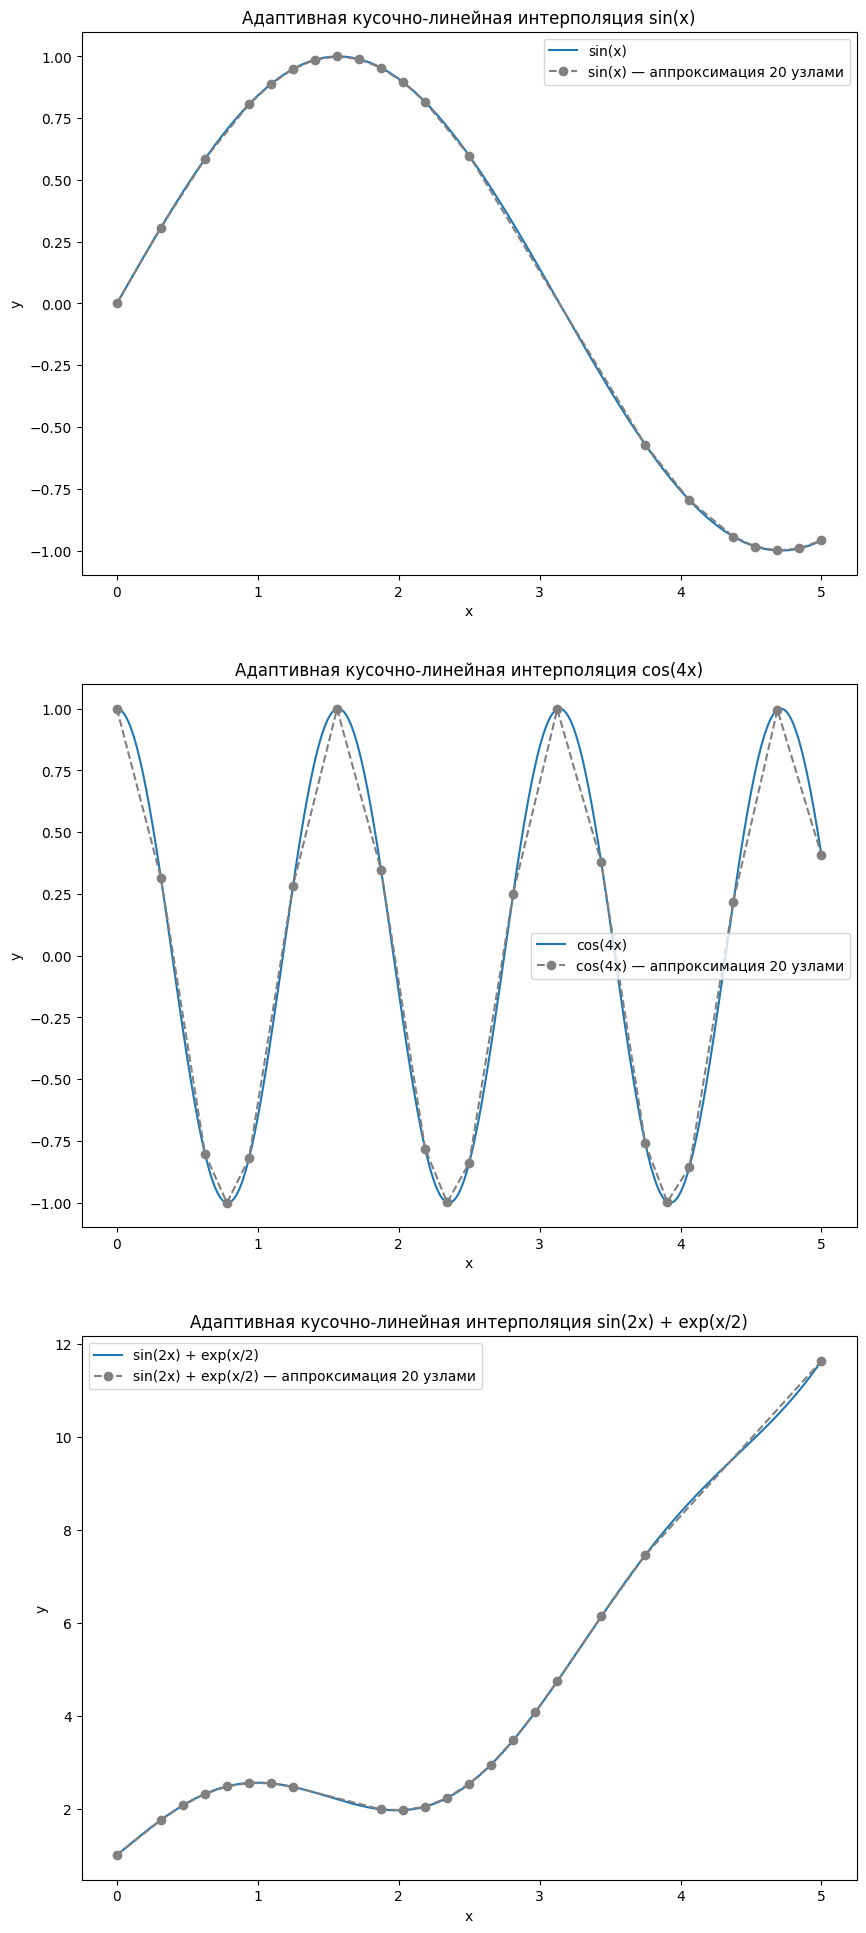

In [17]:
fs = [(f1, "sin(x)"), (f2, 'cos(4x)'), (f3, "sin(2x) + exp(x/2)")]
xs = np.linspace(0, 5, 2000)

fig, axes = plt.subplots(3, 1, figsize=(10, 24))
axes = axes.flatten()

for i, (f, name) in enumerate(fs):
    nodes, values, err = adaptive_linear_interpolation(f, 0, 5, eps=1e-5, max_nodes=20)
    # nodes1, values1, err1 = adaptive_linear_interpolation(f, 0, 5, eps=1e-5, max_nodes=50)
    axes[i].plot(xs, f(xs), label=f"{name}")
    axes[i].plot(nodes, values, 'o--', color="gray", label=f"{name} — аппроксимация 20 узлами")
    # axes[i].plot(nodes1, values1, 'o--', label=f"{name} - interp 50")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].set_title(f"Адаптивная кусочно-линейная интерполяция {name}")
    axes[i].legend()

plt.show()

Кусочно-квадратичная интерполяция

In [21]:
def local_quadratic_interp(x, x0, x1, f0, f1, f_mid):
    x_mid = (x0 + x1) / 2
    L0 = ((x - x_mid)*(x - x1)) / ((x0 - x_mid)*(x0 - x1))
    L1 = ((x - x0)*(x - x1)) / ((x_mid - x0)*(x_mid - x1))
    L2 = ((x - x0)*(x - x_mid)) / ((x1 - x0)*(x1 - x_mid))
    return f0 * L0 + f_mid * L1 + f1 * L2

def adaptive_quadratic_interpolation(f, a, b, eps=1e-5, max_nodes=200):
    nodes = np.array([a, b], dtype=float)
    values = np.array([f(a), f(b)], dtype=float)
    max_error = 0.0

    while len(nodes) < max_nodes:
        mids = 0.5 * (nodes[:-1] + nodes[1:])
        errors = np.zeros(len(mids))
        
        for i in range(len(nodes)-1):
            x0, x1, x_mid = nodes[i], nodes[i+1], (nodes[i] + nodes[i+1]) / 2
            f0, f1 = values[i], values[i+1]

            f_mid = f(x_mid)
            y_test = f(np.array([x0 + (x1 - x0)/3, x0 + 2*(x1 - x0)/3]))
            y_pred = local_quadratic_interp(np.array([x0 + (x1 - x0)/3, x0 + 2*(x1 - x0)/3]), x0, x1, f0, f1, f_mid)
            errors[i] = np.max(np.abs(y_test - y_pred))

        worst = np.argmax(errors)
        max_error = errors[worst]
        if max_error < eps:
            break

        new_mid = mids[worst]
        idx = np.searchsorted(nodes, new_mid)
        nodes = np.insert(nodes, idx, new_mid)
        f_mid = f(new_mid)
        values = np.insert(values, idx, f_mid)

    return nodes, values, max_error

[0.0118681 0.0118681 0.0118681 0.0118681 0.0118681 0.0118681 0.0118681
 0.0118681 0.0118681 0.0118681 0.0118681 0.0118681 0.0118681 0.0118681
 0.0118681 0.0118681 0.0118681 0.0118681 0.0118681 0.0118681]
[0.07734978 0.86045927 0.86045927 0.86045927 0.86045927 0.86045927
 0.86045927 0.86045927 0.86045927 0.86045927 0.86045927 0.86045927
 0.86045927 0.86045927 0.86045927 0.86045927 0.86045927 0.86045927
 0.86045927 0.86045927]
[0.07734978 0.1119973  0.1119973  0.1119973  0.1119973  0.1119973
 0.1119973  0.1119973  0.1119973  0.1119973  0.1119973  0.1119973
 0.1119973  0.1119973  0.1119973  0.1119973  0.1119973  0.1119973
 0.1119973  0.1119973 ]


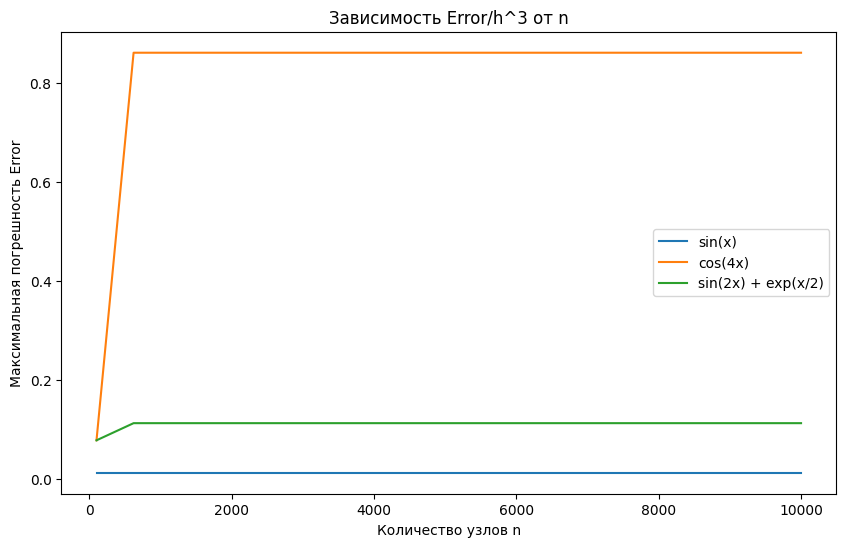

In [23]:
f1 = lambda x: np.sin(x)
f2 = lambda x: np.cos(4*x)
f3 = lambda x: np.sin(2*x) + np.exp(x/2)

fs = [(f1, "sin(x)"), (f2, 'cos(4x)'), (f3, "sin(2x) + exp(x/2)")]
plt.figure(figsize=(10, 6))

for f, name in fs:
    ns = np.linspace(100, 10000-1, 20)
    errors = []
    hs = []

    for n in ns:
        nodes, values, err = adaptive_quadratic_interpolation(f, 0, 5, eps=1e-5, max_nodes=int(n))
        errors.append(max_error)
        h = np.mean(np.diff(nodes))
        hs.append(h)

    # print(hs)
    # print(errors)

    plt.plot(ns, np.array(errors) / np.array(hs)**3, label=name)
    print(np.array(errors) / np.array(hs)**3)
    
plt.xlabel('Количество узлов n')
plt.ylabel('Максимальная погрешность Error')
plt.title('Зависимость Error/h^3 от n')
plt.legend()
plt.show()

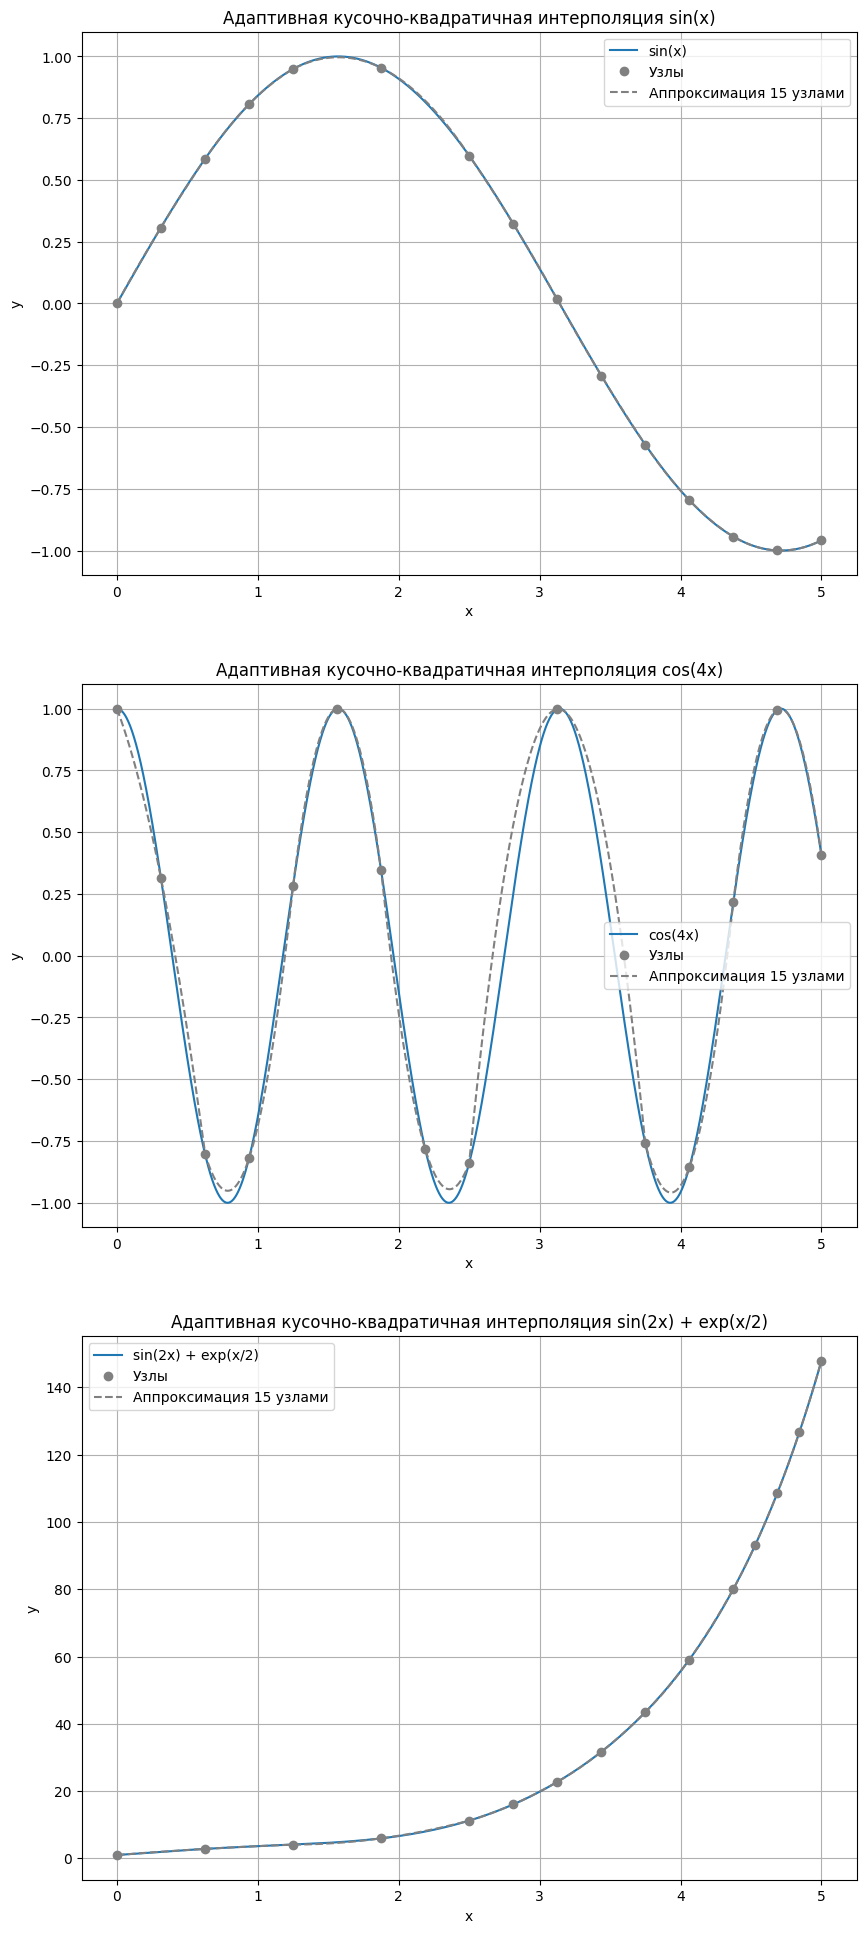

In [52]:
fs = [(f1, "sin(x)"), (f2, 'cos(4x)'), (f3, "sin(2x) + exp(x/2)")]
xs = np.linspace(0, 5, 2000)

def interpolate_quadratic(nodes, values, xs, f_mids):
    y_interp = np.zeros_like(xs)
    idx = np.searchsorted(nodes, xs) - 1
    idx = np.clip(idx, 0, len(nodes) - 2)
    for i in np.unique(idx):
        mask = idx == i
        x0, x1 = nodes[i], nodes[i+1]
        f0, f1 = values[i], values[i+1]
        f_mid = f_mids[i]
        y_interp[mask] = local_quadratic_interp(xs[mask], x0, x1, f0, f1, f_mid)
    return y_interp

fig, axes = plt.subplots(3, 1, figsize=(10, 24))
axes = axes.flatten()

for i, (f, name) in enumerate(fs):
    nodes, values, err = adaptive_quadratic_interpolation(f, 0, 5, eps=1e-5, max_nodes=8)
    f_mids = np.array([f(m) for m in (nodes[:-1] + nodes[1:])/2])
    y_interp = interpolate_quadratic(nodes, values, xs, f_mids)
    axes[i].plot(xs, f(xs), label=f"{name}")
    axes[i].plot(nodes, values, 'o', color="gray", label=f"Узлы")
    axes[i].plot((nodes[:-1] + nodes[1:])/2, f_mids, 'o', color='gray')
    axes[i].plot(xs, y_interp, '--', color="gray", label=f"Аппроксимация {len(nodes)*2-1} узлами")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].set_title(f"Адаптивная кусочно-квадратичная интерполяция {name}")
    axes[i].legend()
    axes[i].grid(True)

plt.show()

Кусочно-кубическая интерполяция

In [38]:
def local_cubic_interp(x, x0, x1, f0, f1, f13, f23):
    x13 = x0 + (x1 - x0) / 3
    x23 = x0 + 2 * (x1 - x0) / 3

    nodes = np.array([x0, x13, x23, x1])
    values = np.array([f0, f13, f23, f1])

    L = []
    for i in range(4):
        xi = nodes[i]
        others = np.delete(nodes, i)
        denom = np.prod(xi - others)
        numer = np.prod([x - xj for xj in others], axis=0)
        L.append(numer / denom)

    return np.dot(values, L)


def adaptive_cubic_interpolation(f, a, b, eps=1e-5, max_nodes=200):
    nodes = np.array([a, b], dtype=float)
    values = np.array([f(a), f(b)], dtype=float)
    max_error = 0.0

    while len(nodes) < max_nodes:
        mids = 0.5 * (nodes[:-1] + nodes[1:])
        errors = np.zeros(len(mids))

        for i in range(len(nodes)-1):
            x0, x1, x_mid = nodes[i], nodes[i+1], (nodes[i] + nodes[i+1]) / 2
            h = x1 - x0
            x13, x23 = x0 + h/3, x0 + 2*h/3
            f0, f1 = values[i], values[i+1]
            f13 = f(x13)
            f23 = f(x23)

            y_true = f(x_mid)
            y_pred = local_cubic_interp(x_mid, x0, x1, f0, f1, f13, f23)
            errors[i] = abs(y_true - y_pred)

        worst = np.argmax(errors)
        max_error = errors[worst]
        if max_error < eps:
            break

        new_mid = mids[worst]
        insert_idx = np.searchsorted(nodes, new_mid)
        nodes = np.insert(nodes, insert_idx, new_mid)
        values = np.insert(values, insert_idx, f(new_mid))

    return nodes, values, max_error

[0.0002866 0.0002866 0.0002866 0.0002866 0.0002866 0.0002866 0.0002866
 0.0002866 0.0002866 0.0002866 0.0002866 0.0002866 0.0002866 0.0002866
 0.0002866 0.0002866 0.0002866 0.0002866 0.0002866 0.0002866]
[0.07259103 0.07259103 0.07259103 0.07259103 0.07259103 0.07259103
 0.07259103 0.07259103 0.07259103 0.07259103 0.07259103 0.07259103
 0.07259103 0.07259103 0.07259103 0.07259103 0.07259103 0.07259103
 0.07259103 0.07259103]
[0.03065894 0.03065894 0.03065894 0.03065894 0.03065894 0.03065894
 0.03065894 0.03065894 0.03065894 0.03065894 0.03065894 0.03065894
 0.03065894 0.03065894 0.03065894 0.03065894 0.03065894 0.03065894
 0.03065894 0.03065894]


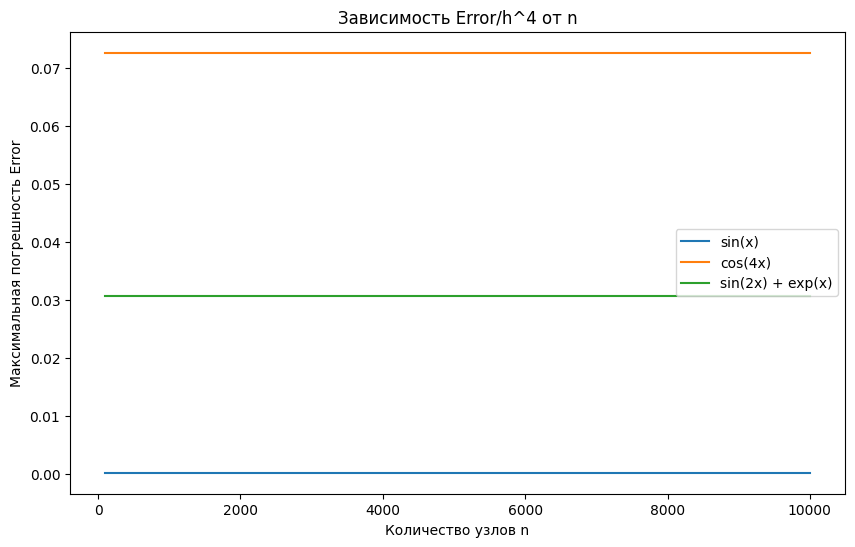

In [39]:
f1 = lambda x: np.sin(x)
f2 = lambda x: np.cos(4*x)
f3 = lambda x: np.sin(2*x) + np.exp(x)

fs = [(f1, "sin(x)"), (f2, 'cos(4x)'), (f3, "sin(2x) + exp(x)")]
plt.figure(figsize=(10, 6))

for f, name in fs:
    ns = np.linspace(100, 10000-1, 20)
    errors = []
    hs = []

    for n in ns:
        nodes, values, max_error = adaptive_cubic_interpolation(f, 0, 5, eps=1e-5, max_nodes=int(n))
        errors.append(max_error)
        h = np.mean(np.diff(nodes))
        hs.append(h)
        # print(nodes, values, max_error)


    plt.plot(ns, np.array(errors) / np.array(hs)**4, label=name)
    print(np.array(errors) / np.array(hs)**4)
    
plt.xlabel('Количество узлов n')
plt.ylabel('Максимальная погрешность Error')
plt.title('Зависимость Error/h^4 от n')
plt.legend()
plt.show()

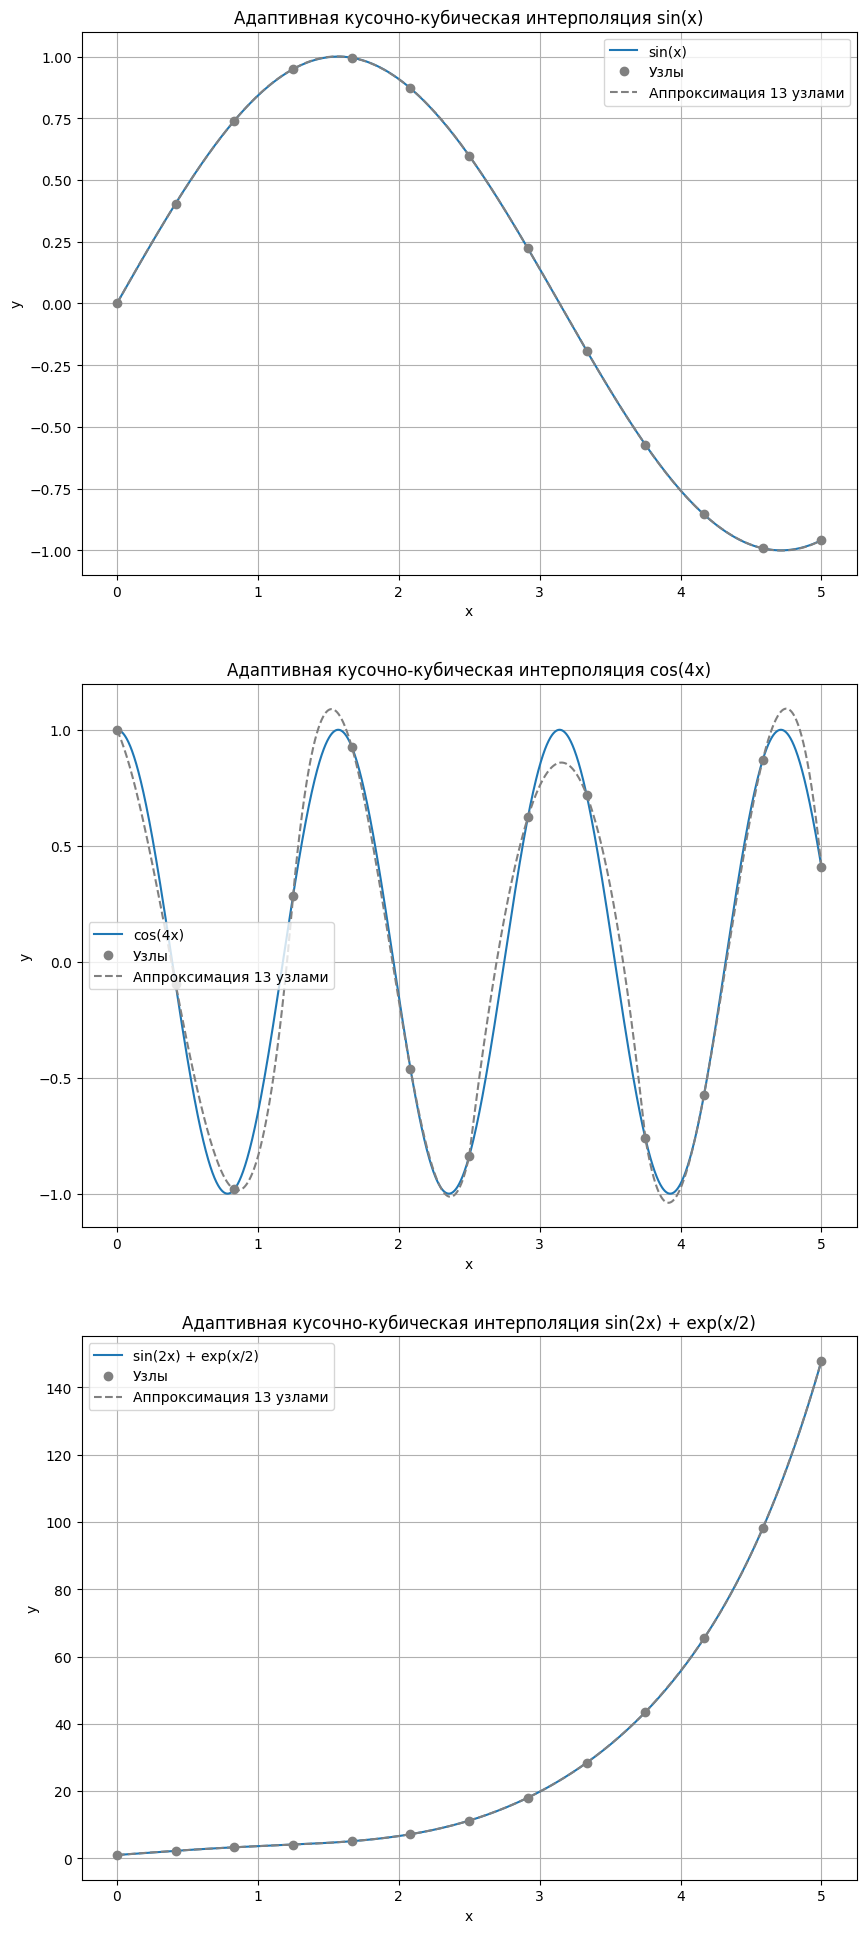

In [ ]:
fs = [(f1, "sin(x)"), (f2, 'cos(4x)'), (f3, "sin(2x) + exp(x/2)")]
xs = np.linspace(0, 5, 2000)

def interpolate_cubic(nodes, values, xs, f13_list, f23_list):
    y_interp = np.zeros_like(xs)
    idx = np.searchsorted(nodes, xs) - 1
    idx = np.clip(idx, 0, len(nodes) - 2)

    for i in np.unique(idx):
        mask = idx == i
        x0, x1 = nodes[i], nodes[i + 1]
        f0, f1 = values[i], values[i + 1]
        f13 = f13_list[i]
        f23 = f23_list[i]
        y_interp[mask] = local_cubic_interp(xs[mask], x0, x1, f0, f1, f13, f23)

    return y_interp

def get_lists(nodes):
    f13_list, f23_list = [], []
    nodes13, nodes23 = [], []
    for i in range(len(nodes) - 1):
        h = nodes[i+1] - nodes[i]
        f13_list.append(f(nodes[i] + h/3))
        f23_list.append(f(nodes[i] + 2*h/3))
        nodes13.append(nodes[i] + h/3)
        nodes23.append(nodes[i] + 2*h/3)
    return np.array(f13_list), np.array(f23_list), nodes13, nodes23

fig, axes = plt.subplots(3, 1, figsize=(10, 24))
axes = axes.flatten()

for i, (f, name) in enumerate(fs):
    nodes, values, err = adaptive_cubic_interpolation(f, 0, 5, eps=1e-5, max_nodes=5)
    f13_list, f23_list, nodes13, nodes23 = get_lists(nodes)
    y_interp = interpolate_cubic(nodes, values, xs, f13_list, f23_list)
    axes[i].plot(xs, f(xs), label=f"{name}")
    axes[i].plot(nodes, values, 'o', color="gray", label=f"Узлы")
    axes[i].plot(nodes13, f13_list, 'o', color='gray')
    axes[i].plot(nodes23, f23_list, 'o', color='gray')
    axes[i].plot(xs, y_interp, '--', color="gray", label=f"Аппроксимация {len(nodes)*3-2} узлами")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].set_title(f"Адаптивная кусочно-кубическая интерполяция {name}")
    axes[i].legend()
    axes[i].grid(True)

plt.show()

Кусочно-кубическая интерполяция с Эрмитовым базисом

In [54]:
def hermite_basis(t):
    h00 = 2*t**3 - 3*t**2 + 1
    h10 = t**3 - 2*t**2 + t
    h01 = -2*t**3 + 3*t**2
    h11 = t**3 - t**2
    return h00, h10, h01, h11

def local_hermite_interp(x, x0, x1, f0, f1, df0, df1):
    h = x1 - x0
    t = (x - x0) / h
    h00, h10, h01, h11 = hermite_basis(t)
    return (h00 * f0 +
            h10 * h * df0 +
            h01 * f1 +
            h11 * h * df1)

def adaptive_hermite_interpolation(f, df, a, b, eps=1e-5, max_nodes=200):
    nodes = np.array([a, b], dtype=float)
    fvals = np.array([f(a), f(b)], dtype=float)
    dfvals = np.array([df(a), df(b)], dtype=float)
    max_error = 0.0

    while len(nodes) < max_nodes:
        mids = 0.5 * (nodes[:-1] + nodes[1:])
        errors = np.zeros(len(mids))

        for i in range(len(nodes)-1):
            x0, x1, x_mid = nodes[i], nodes[i+1], (nodes[i] + nodes[i+1]) / 2
            f0, f1 = fvals[i], fvals[i+1]
            df0, df1 = dfvals[i], dfvals[i+1]

            y_true = f(x_mid)
            y_pred = local_hermite_interp(x_mid, x0, x1, f0, f1, df0, df1)
            errors[i] = abs(y_true - y_pred)

        worst = np.argmax(errors)
        max_error = errors[worst]
        if max_error < eps:
            break

        new_x = mids[worst]
        idx = np.searchsorted(nodes, new_x)
        nodes = np.insert(nodes, idx, new_x)
        fvals = np.insert(fvals, idx, f(new_x))
        dfvals = np.insert(dfvals, idx, df(new_x))

    return nodes, fvals, dfvals, max_error

[0.0048257 0.0048257 0.0048257 0.0048257 0.0048257 0.0048257 0.0048257
 0.0048257 0.0048257 0.0048257 0.0048257 0.0048257 0.0048257 0.0048257
 0.0048257 0.0048257 0.0048257 0.0048257 0.0048257 0.0048257]
[2.51623764 2.40433961 2.40433961 2.40433961 2.40433961 2.40433961
 2.40433961 2.40433961 2.40433961 2.40433961 2.40433961 2.40433961
 2.40433961 2.40433961 2.40433961 2.40433961 2.40433961 2.40433961
 2.40433961 2.40433961]
[  284.38375131 11967.57788478 38746.55179376 55595.5550526
 55595.5550526  55595.5550526  55595.5550526  55595.5550526
 55595.5550526  55595.5550526  55595.5550526  55595.5550526
 55595.5550526  55595.5550526  55595.5550526  55595.5550526
 55595.5550526  55595.5550526  55595.5550526  55595.5550526 ]


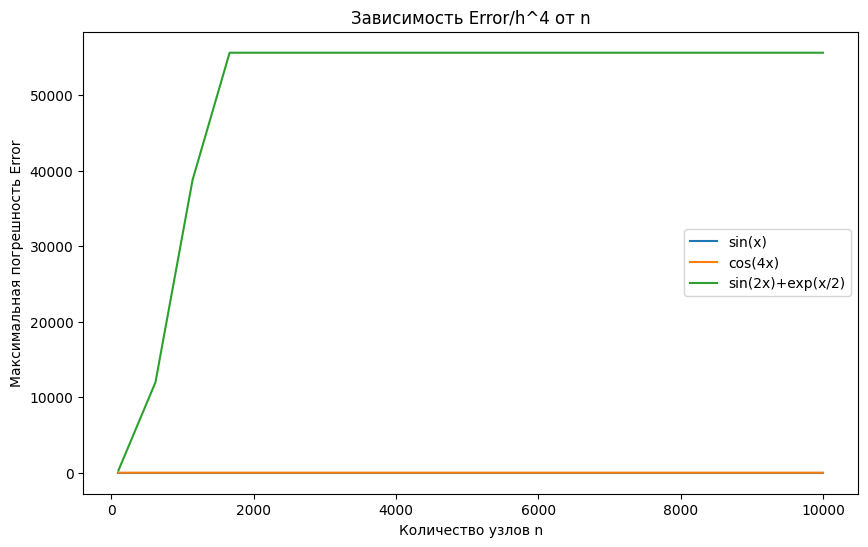

In [55]:
fs = [
    (lambda x: np.sin(x), lambda x: np.cos(x), "sin(x)"),
    (lambda x: np.cos(4*x), lambda x: -4*np.sin(4*x), "cos(4x)"),
    (lambda x: np.sin(2*x)+np.exp(x/2), lambda x: 2*np.cos(x)+np.exp(x/2)/2, "sin(2x)+exp(x/2)")
]

plt.figure(figsize=(10,6))

for f, df, name in fs:
    ns = np.linspace(100, 10000-1, 20, dtype=int)
    errors = []
    hs = []
    for n in ns:
        nodes, vals, ders, err = adaptive_hermite_interpolation(f, df, 0, 5, eps=1e-5, max_nodes=n)
        errors.append(err)
        hs.append(np.mean(np.diff(nodes)))
    errors = np.array(errors)
    hs = np.array(hs)

    plt.plot(ns, np.array(errors) / np.array(hs)**4, label=name)
    print(np.array(errors) / np.array(hs)**4)
    
plt.xlabel('Количество узлов n')
plt.ylabel('Максимальная погрешность Error')
plt.title('Зависимость Error/h^4 от n')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

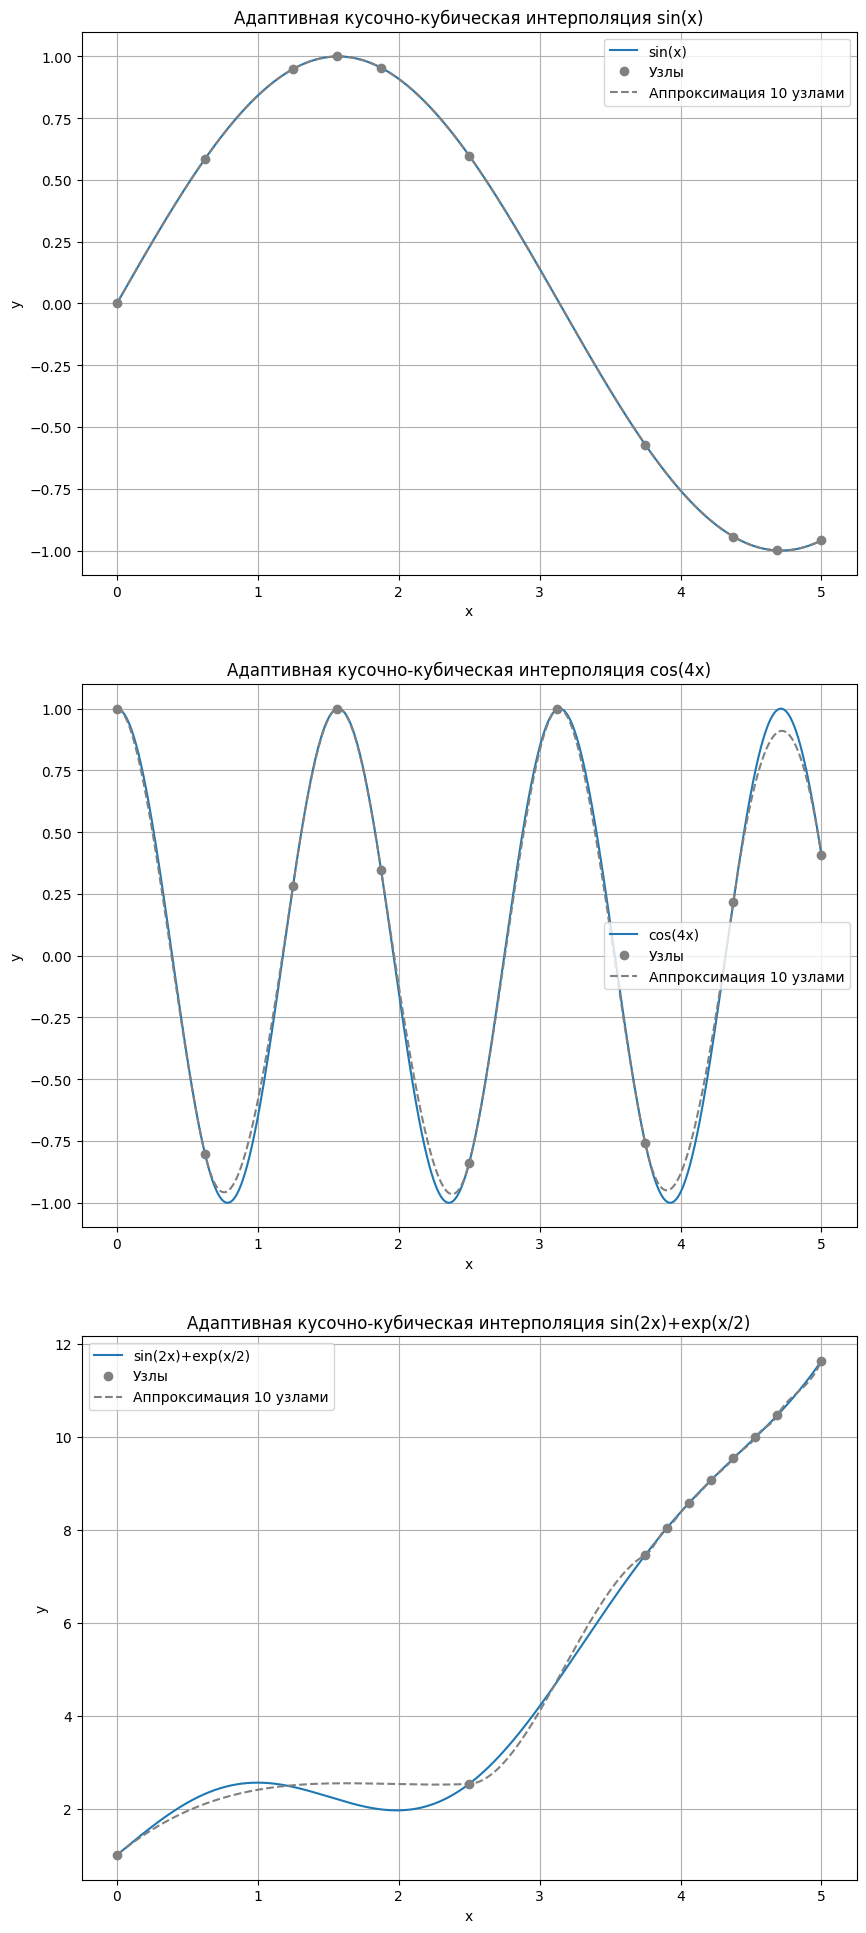

In [63]:
f1 = lambda x: np.sin(x)
f2 = lambda x: np.cos(4*x)
f3 = lambda x: np.sin(2*x) + np.exp(x)

fs = [
    (lambda x: np.sin(x), lambda x: np.cos(x), "sin(x)"),
    (lambda x: np.cos(4*x), lambda x: -4*np.sin(4*x), "cos(4x)"),
    (lambda x: np.sin(2*x)+np.exp(x/2), lambda x: 2*np.cos(x)+np.exp(x/2)/2, "sin(2x)+exp(x/2)")
]
plt.figure(figsize=(10, 6))

def interpolate_hermite(nodes, fvals, dfvals, xs):
    y_interp = np.zeros_like(xs)
    idx = np.searchsorted(nodes, xs) - 1
    idx = np.clip(idx, 0, len(nodes) - 2)

    for i in np.unique(idx):
        mask = (idx == i)
        x0, x1 = nodes[i], nodes[i+1]
        f0, f1 = fvals[i], fvals[i+1]
        df0, df1 = dfvals[i], dfvals[i+1]
        y_interp[mask] = local_hermite_interp(xs[mask], x0, x1, f0, f1, df0, df1)

    return y_interp

fig, axes = plt.subplots(3, 1, figsize=(10, 24))
axes = axes.flatten()

for i, (f, df, name) in enumerate(fs):
    nodes, fvals, dfvals, error = adaptive_hermite_interpolation(f, df, 0, 5, eps=1e-5, max_nodes=10)
    y_interp = interpolate_hermite(nodes, fvals, dfvals, xs)
    axes[i].plot(xs, f(xs), label=f"{name}")
    axes[i].plot(nodes, fvals, 'o', color="gray", label=f"Узлы")
    # axes[i].plot(nodes, dfvals, 'o', color="gray")
    axes[i].plot(xs, y_interp, '--', color="gray", label=f"Аппроксимация {len(nodes)} узлами")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].set_title(f"Адаптивная кусочно-кубическая интерполяция {name}")
    axes[i].legend()
    axes[i].grid(True)

plt.show()

### Метод наименьших квадратов

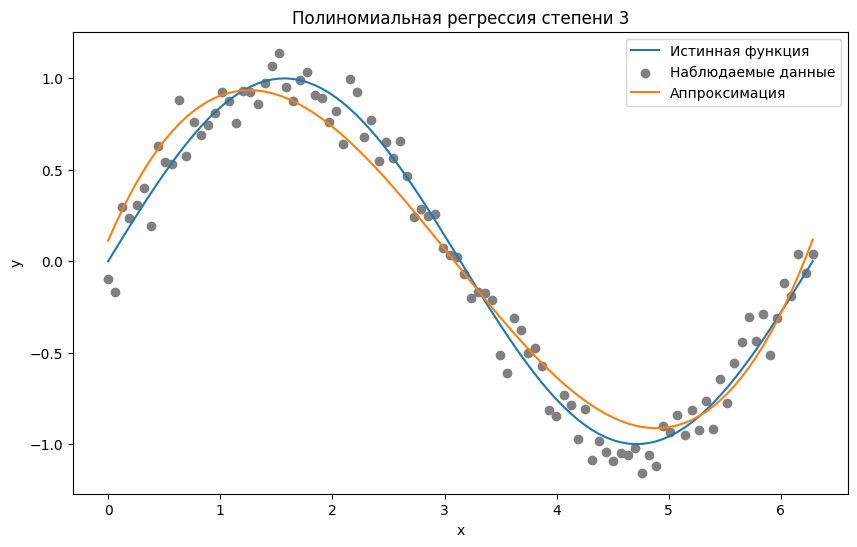

In [93]:
def regression(X, y, alpha=1e-3):
    n, m = X.shape

    c = np.ones(n) + 0.5 * np.random.randn(n) # веса
    C = np.diag(c)
    A = X.T @ C @ X # левая часть системы
    b = X.T @ C @ y # правая часть системы
    
    #Матрица второй разности
    D = np.zeros((m - 2, m))
    for j in range(m - 2):
        D[j, j] = 1
        D[j, j + 1] = -2
        D[j, j + 2] =  1

    R = D.T @ D
    Areg = A + alpha * R

    w = np.linalg.solve(Areg, b)
    return w


x = np.linspace(0, 2*np.pi, 100)
y_true = np.sin(x)
y = y_true + 0.1 * np.random.randn(len(x))

degree = 3
X = np.vander(x, N=degree + 1, increasing=True)
w = regression(X, y, alpha=0.1)
y_pred = X @ w

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Истинная функция')
plt.scatter(x, y, label='Наблюдаемые данные', color='gray')
plt.plot(x, y_pred, label='Аппроксимация')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Полиномиальная регрессия степени {degree}')
plt.legend()
plt.show()

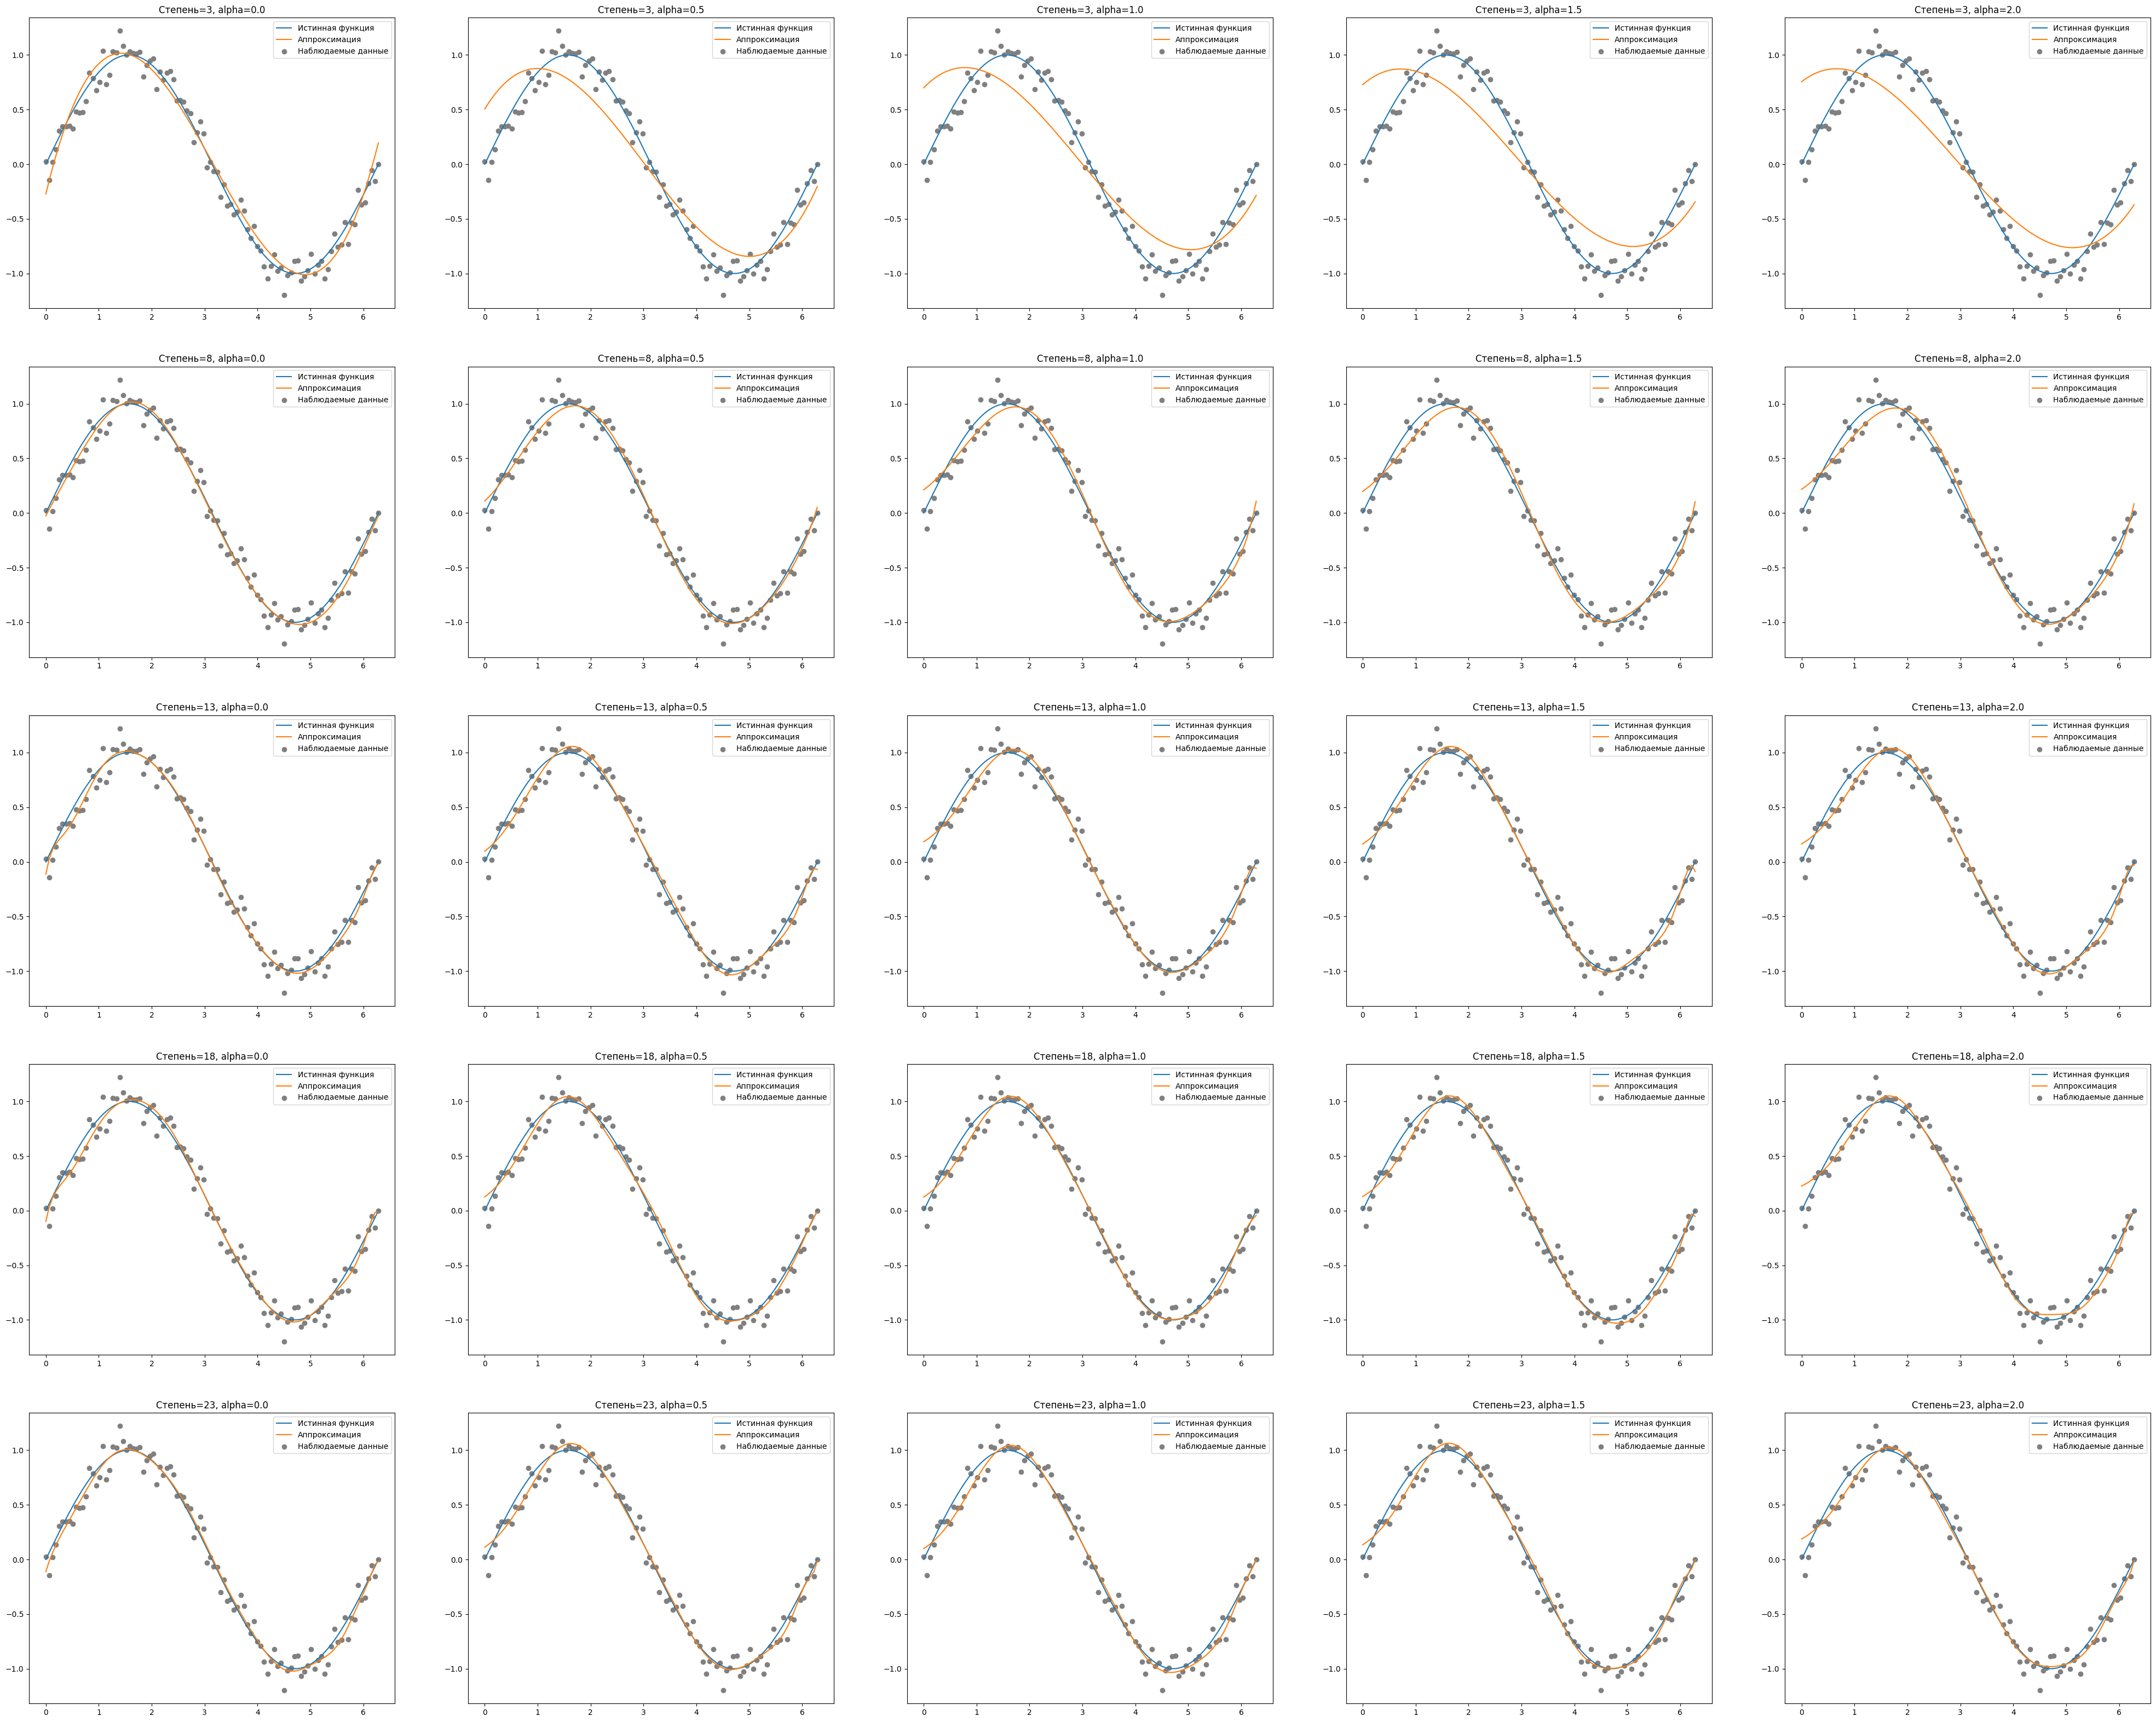

In [94]:
x = np.linspace(0, 2*np.pi, 100)
y_true = np.sin(x)
y = y_true + 0.1 * np.random.randn(len(x))

fig, axes = plt.subplots(5, 5, figsize=(50, 40))

alphas = np.linspace(0, 2, 5)

for i, degree in enumerate(range(3, 28, 5)):
    X = np.vander(x, N=degree + 1, increasing=True)
    for j, alpha in enumerate(alphas):
        w = regression(X, y, alpha=alpha)
        y_pred = X @ w
        axes[i][j].plot(x, y_true, label="Истинная функция")
        axes[i][j].plot(x, y_pred, label="Аппроксимация")
        axes[i][j].scatter(x, y, label="Наблюдаемые данные", color='gray')
        axes[i][j].set_title(f"Степень={degree}, alpha={round(alpha, 2)}")
        axes[i][j].legend()

### Квадратурные формулы

In [95]:
def cent_recs(f, a, b, n=100):
    h = (b - a) / n
    integral = 0
    for i in range(n):
        x = a + (i + 0.5) * h
        integral += f(x)
    integral *= h
    return integral

def trap(f, a, b, n=100):
    h = (b - a) / n
    integral = (f(a) + f(b)) / 2
    for i in range(1, n):
        x = a + i * h
        integral += f(x)
    integral *= h
    return integral

def simpson(f, a, b, n=100):
    h = (b - a) / n
    integral = f(a) + f(b)
    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            integral += 2 * f(x)
        else:
            integral += 4 * f(x)
    integral *= h / 3
    return integral

print(cent_recs(np.sin, 0, np.pi))
print(trap(np.sin, 0, np.pi))
print(simpson(np.sin, 0, np.pi))

2.0000822490709864
1.9998355038874436
2.0000000108245044


[0.03831453 0.03838796 0.03841316 0.0384259  0.03843359 0.03843873
 0.03844241 0.03844518 0.03844733 0.03844906 0.03845047 0.03845165
 0.03845265 0.0384535  0.03845424 0.03845489 0.03845547 0.03845598
 0.03845643 0.03845684 0.03845721 0.03845755 0.03845786 0.03845814
 0.0384584  0.03845864 0.03845887 0.03845907 0.03845927 0.03845945
 0.03845961 0.03845977 0.03845992 0.03846006 0.03846019 0.03846031
 0.03846043 0.03846054 0.03846065 0.03846075 0.03846084 0.03846093
 0.03846102 0.0384611  0.03846118 0.03846126 0.03846133 0.0384614
 0.03846147 0.03830814]
[0.0715742  0.07173603 0.0717877  0.0718131  0.07182821 0.07183822
 0.07184535 0.07185067 0.07185481 0.07185811 0.07186081 0.07186305
 0.07186495 0.07186658 0.07186799 0.07186922 0.0718703  0.07187127
 0.07187213 0.07187291 0.07187361 0.07187425 0.07187483 0.07187536
 0.07187585 0.07187631 0.07187673 0.07187712 0.07187748 0.07187782
 0.07187813 0.07187843 0.07187871 0.07187897 0.07187922 0.07187945
 0.07187967 0.07187988 0.07188008 0.071

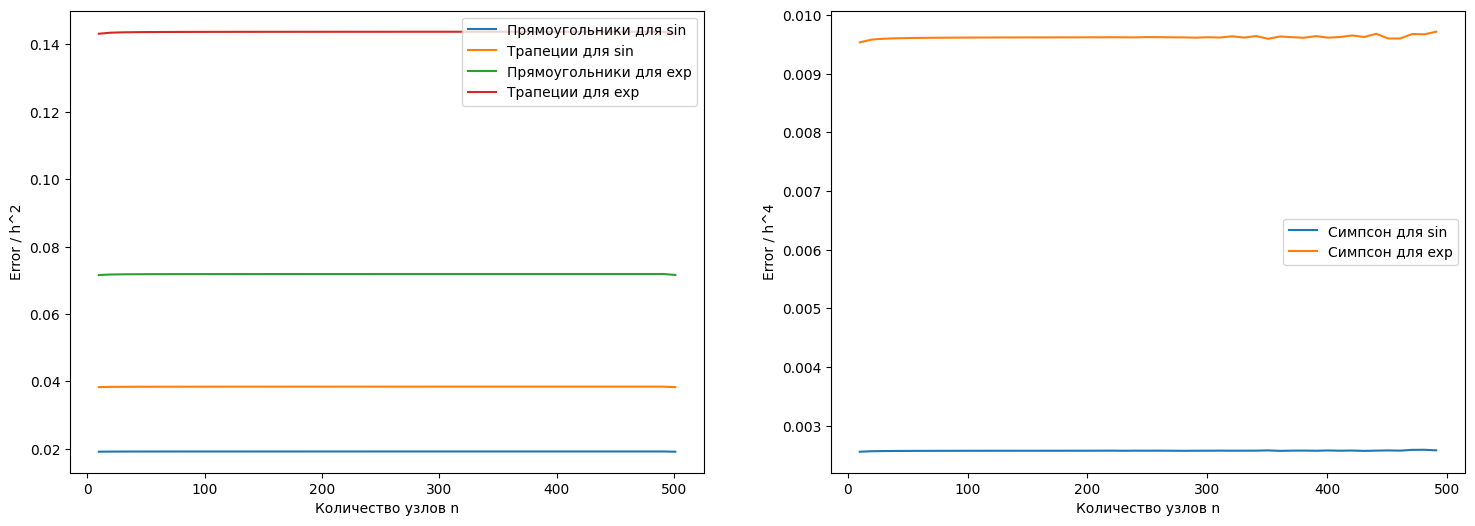

In [114]:
f1 = np.sin
f2 = np.exp
If1 = lambda x: -1*np.cos(x)
If2 = np.exp

ns = np.linspace(10, 501, 50)

hs = np.array([1/n for n in ns])

errors = {
    "sin": {
        "recs": [],
        "trap": [],
        "simp": []
    },
    "exp": {
        "recs": [],
        "trap": [],
        "simp": []
    }
}

for n in ns:
    errors["sin"]["recs"].append(abs(cent_recs(f1, 0, 1, int(n)) - If1(1) + If1(0)))
    errors["sin"]["trap"].append(abs(trap(f1, 0, 1, int(n)) - If1(1) + If1(0)))
    errors["sin"]["simp"].append(abs(simpson(f1, 0, 1, int(n)) - If1(1) + If1(0)))

    errors["exp"]["recs"].append(abs(cent_recs(f2, 0, 1, int(n)) - If2(1) + If2(0)))
    errors["exp"]["trap"].append(abs(trap(f2, 0, 1, int(n)) - If2(1) + If2(0)))
    errors["exp"]["simp"].append(abs(simpson(f2, 0, 1, int(n)) - If2(1) + If2(0)))


print(np.round(errors["sin"]["trap"] / hs**2, 10))
print(np.round(errors["exp"]["recs"] / hs**2, 10))
print(np.round(errors["sin"]["simp"] / hs**4, 10))
print(np.round(errors["exp"]["simp"] / hs**4, 10))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# axes[0].plot(hs, hs**2, label="hs^2")
axes[0].plot(ns, errors["sin"]["recs"] / hs**2, label="Прямоугольники для sin")
axes[0].plot(ns, errors["sin"]["trap"] / hs**2, label="Трапеции для sin")
axes[0].plot(ns, errors["exp"]["recs"] / hs**2, label="Прямоугольники для exp")
axes[0].plot(ns, errors["exp"]["trap"] / hs**2, label="Трапеции для exp")
axes[0].set_xlabel("Количество узлов n")
axes[0].set_ylabel("Error / h^2")
axes[0].legend()

# axes[1].plot(hs, hs**4, label="hs^4")
axes[1].plot(ns[:-1], (errors["sin"]["simp"] / hs**4)[:-1], label="Симпсон для sin")
axes[1].plot(ns[:-1], (errors["exp"]["simp"] / hs**4)[:-1], label="Симпсон для exp")
axes[1].set_xlabel("Количество узлов n")
axes[1].set_ylabel("Error / h^4")
axes[1].legend()

plt.show()

[1.8129e-06 1.6240e-06 1.5939e-06 1.5837e-06 1.5790e-06 1.5765e-06
 1.5750e-06 1.5740e-06 1.5733e-06 1.5728e-06 1.5725e-06 1.5722e-06
 1.5720e-06 1.5718e-06 1.5717e-06 1.5716e-06 1.5715e-06 1.5714e-06
 1.5714e-06 1.5713e-06 1.5713e-06 1.5712e-06 1.5712e-06 1.5712e-06
 1.5711e-06 1.5711e-06 1.5711e-06 1.5711e-06 1.5710e-06 1.5710e-06
 1.5710e-06 1.5710e-06 1.5710e-06 1.5710e-06 1.5710e-06 1.5710e-06
 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06
 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06
 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06
 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06 1.5709e-06
 1.5709e-06 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06
 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06
 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06
 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06
 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06 1.5708e-06 1.5708

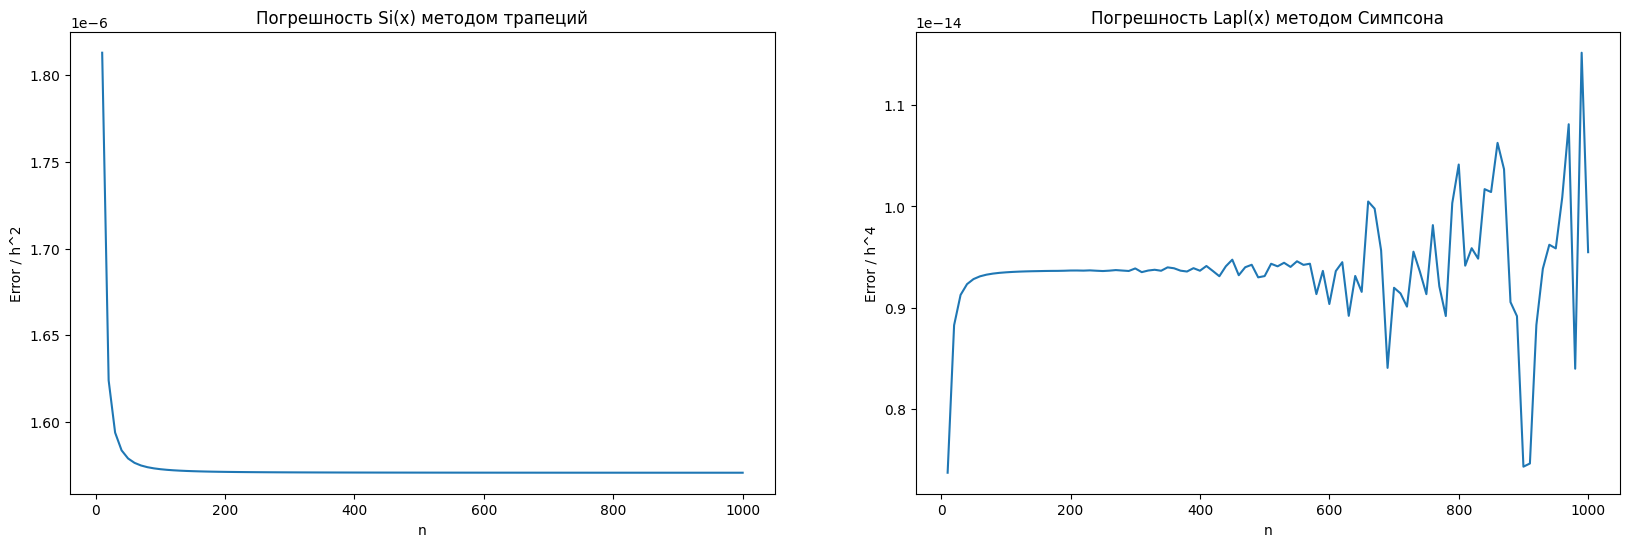

In [118]:
def Si(x, n=100, method="trap"):
    f = lambda x: np.sin(x) / x
    if method != "trap":
        return simpson(f, 1e-10, x, n)
    return trap(f, 1e-10, x, n)

def Lapl(x, n=100, method="trap"):
    f = lambda x: np.exp(-x**2)
    if method != "trap":
        return simpson(f, 1e-10, x, n)
    return trap(f, 1e-10, x, n)

ns = np.linspace(10, 1000, 100)
hs = 1000 / ns
si_errors = []
lapl_errors = []
for n in ns:
    si_errors.append(abs(Si(np.pi*8, int(n)) - Si(np.pi*8, int(2*n))))
    lapl_errors.append(abs(Lapl(3, int(n), "simp") - Lapl(3, int(2*n), "simp")))


print(np.round(si_errors / hs**2, 10))
print(np.round(lapl_errors / hs**4, 10))

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# axes[0].plot(hs, hs**2, label="h^2")
axes[0].plot(ns, si_errors / hs**2)
axes[0].set_title("Погрешность Si(x) методом трапеций")
axes[0].set_xlabel("n")
axes[0].set_ylabel("Error / h^2")

# axes[1].plot(hs, hs**4, label="h^4")
axes[1].plot(ns, lapl_errors / hs**4)
axes[1].set_title("Погрешность Lapl(x) методом Симпсона")
axes[1].set_xlabel("n")
axes[1].set_ylabel("Error / h^4")
plt.show()

Дан стержень плотности p(x) и материальная точка массы m на расстоянии y от стержня. найти силу, действующую между ними в точке x.

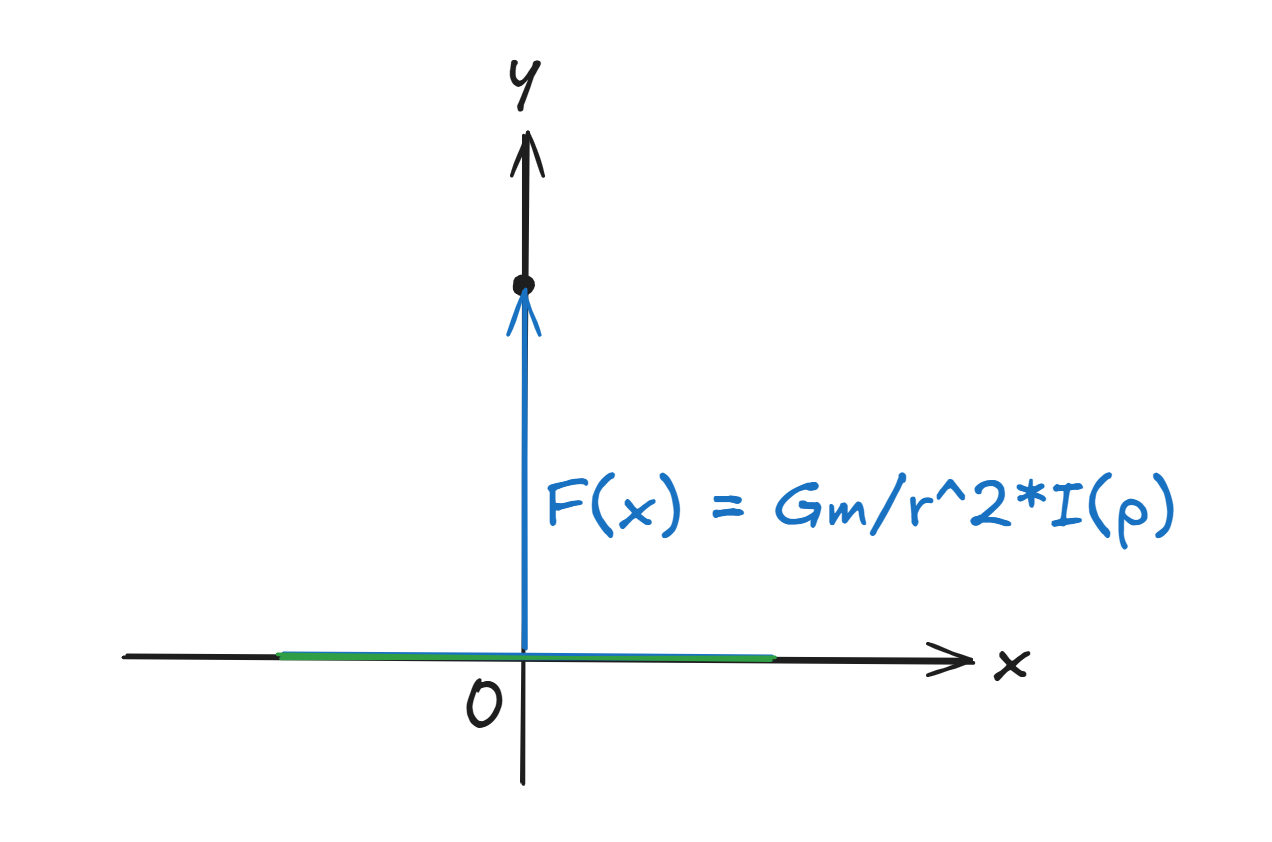

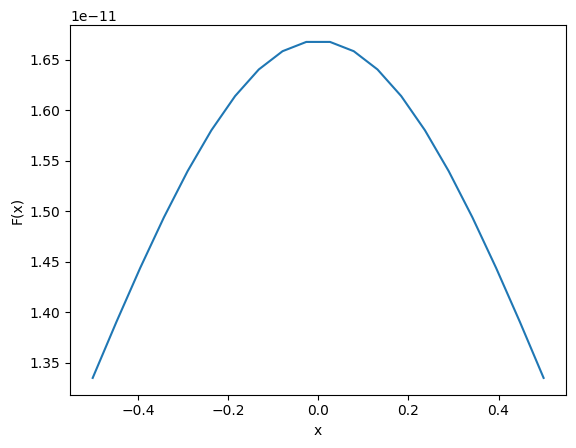

In [120]:
G = 6.6743*1e-11
L = 1

def F(x, y, p, m, L=1):
    return G * m / (x**2 + y**2) * simpson(p, -L/2, L/2)

xs = np.linspace(-L/2, L/2, 20)
fs = []
for x in xs:
    fs.append(F(x=x, y=1, p=lambda x: abs(x), m=1, L=L))

plt.plot(xs, fs)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

1. Приближенное решение нелинейных уравнений от одной переменной
- Опробовать на задаче про русла разной ширины (Ньютона, Бисекций, Секущих)
- Решить f(x) = 0
- Найти обратную функцию
- Вычислить значение неявной функции f(x, y) = 0. Определить точки ветвления(бифуркации).
- Показать, что все работает правильно
2. Аппроксимация функций (одной переменной)
- Кусочно-линейная интерполяция (показать h^2 сходимость для функций C^2)
- Кусочно-квадратичная интерполяция (показать h^3 сходимость для функций C^3)
- Кусочно-кубическая интерполяция (показать h^4 сходимость)
- Я использовал лагранжеву, добавить еще Эрмитову для кусочно-кубической, добавить график функции и увидеть константу

- fh(x) как разреженная матрица
- Для второй простые функции sin(kpx), exp(ax),

Для чего использовать квадратичную интерполяцию и как формируется глобальный базис из локального.
csrc

- Метод наименьших квадратов (Добавить регуляризацию, тест на сходимость, численный эксперимент )
- Cоставные квадратурные формулы (Тес на сходимость, O(h^p), p=2 для прямоугольников и трапеций, p=4 для Симпсона, взять функцию p-раз непрервыно дифференцируемую, взять пример, нарушающий тест на сходимость).
Вычислить интегральный синус, функция Лапласа, вычислисть приближенно на миллионе точек. Протестировать их на |I(h) - I(h/2)| = O(h^p)
Дан физический стержень [0, l] плотности p(x), вычислить его массу.
Дан стержень [0, l] плотности p(x), дана точка над стержнем массы m. Вычислить F(x). Решить обратную к ней задачу, где ищется p(x).
